In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('Rose.csv',parse_dates=True,index_col='YearMonth')
df.head()

,Rose
YearMonth,
1980-01-01,112.0
1980-02-01,118.0
1980-03-01,129.0
1980-04-01,99.0
1980-05-01,116.0


In [3]:
df.isnull().sum()

Rose    2
dtype: int64

In [4]:
df = df.interpolate()

In [5]:
df.isnull().sum()

Rose    0
dtype: int64

In [6]:
from pylab import rcParams
rcParams['figure.figsize'] = 15,8

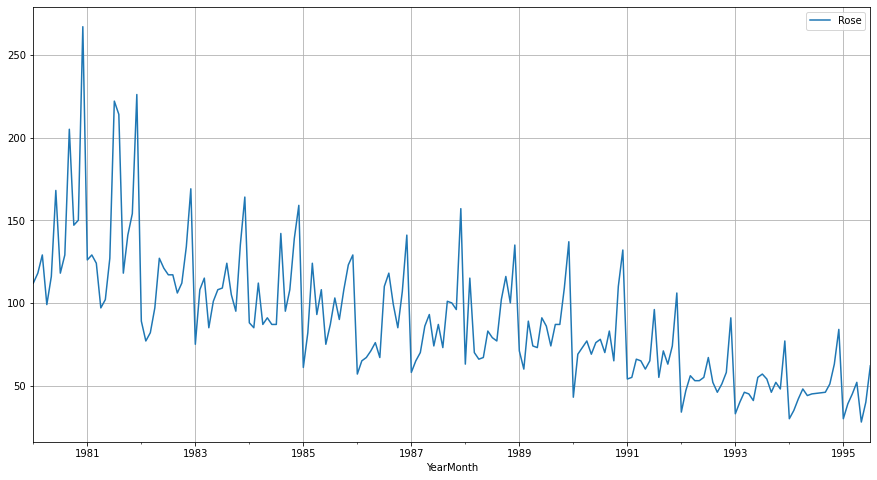

In [7]:
df.plot(grid=True);

In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rose    187 non-null    float64
dtypes: float64(1)
memory usage: 2.9 KB


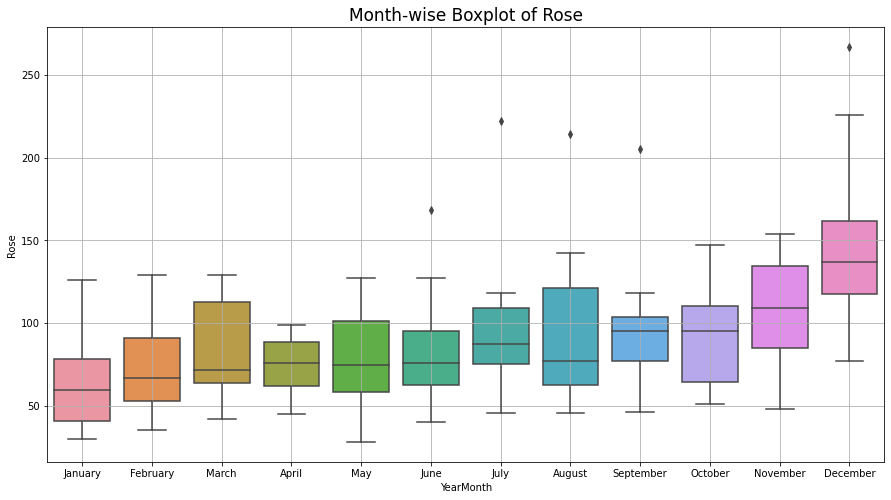

In [8]:
sns.boxplot(x = df.index.month_name(), y = df['Rose']);
plt.grid();
plt.title('Month-wise Boxplot of Rose', fontsize=17);
plt.savefig('Rose_monthwise_box.jpg', bbox_inches='tight');

In [9]:
from    statsmodels.tsa.seasonal import   seasonal_decompose

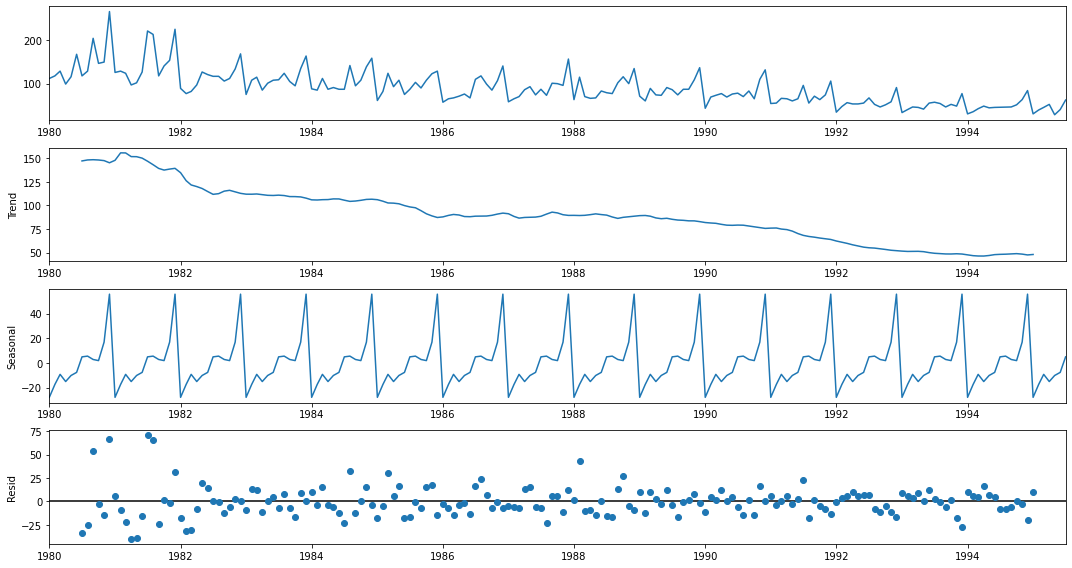

In [10]:
decompositionr = seasonal_decompose(df,model='additive')

decompositionr.plot()
plt.savefig('decomposer.jpg', bbox_inches='tight')

In [12]:
trend = decompositionr.trend
seasonality = decompositionr.seasonal
residual = decompositionr.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

trend.head(12).to_csv('Rose_trend.csv')
seasonality.head(12).to_csv('Rose_season.csv')
residual.head(12).to_csv('Rose_resid.csv')

Trend 
 YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01    147.083333
1980-08-01    148.125000
1980-09-01    148.375000
1980-10-01    148.083333
1980-11-01    147.416667
1980-12-01    145.125000
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01   -27.908647
1980-02-01   -17.435632
1980-03-01    -9.285830
1980-04-01   -15.098330
1980-05-01   -10.196544
1980-06-01    -7.678687
1980-07-01     4.896908
1980-08-01     5.499686
1980-09-01     2.774686
1980-10-01     1.871908
1980-11-01    16.846908
1980-12-01    55.713575
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01          NaN
1980-02-01          NaN
1980-03-01          NaN
1980-04-01          NaN
1980-05-01          NaN
1980-06-01          NaN
1980-07-01   -33.980241
1980-08-01   -24.624686
1980-09-01    53.850314
1980-10-01    -2.955241
1980-11-01   -14.263575
1980-12-01    66.16142

In [13]:
cvsa = residual.std()/residual.mean()
cvsa

-204.43804796241358

<AxesSubplot:xlabel='YearMonth'>

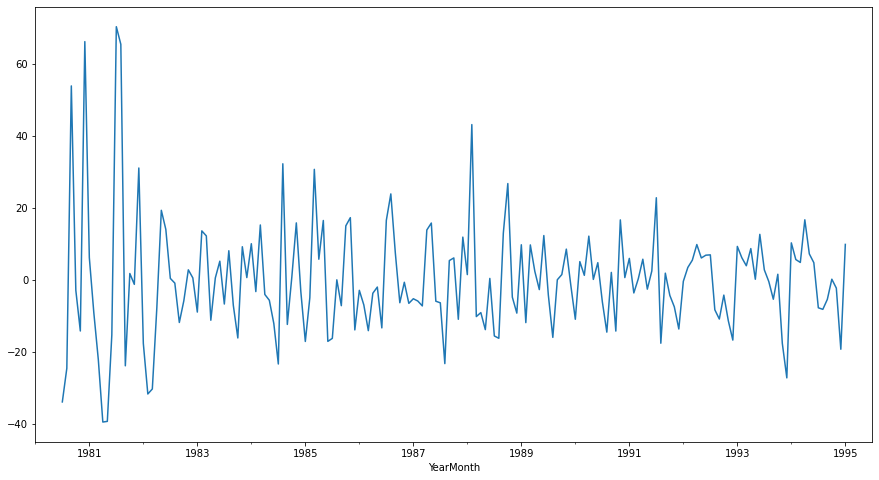

In [15]:
residual.plot()

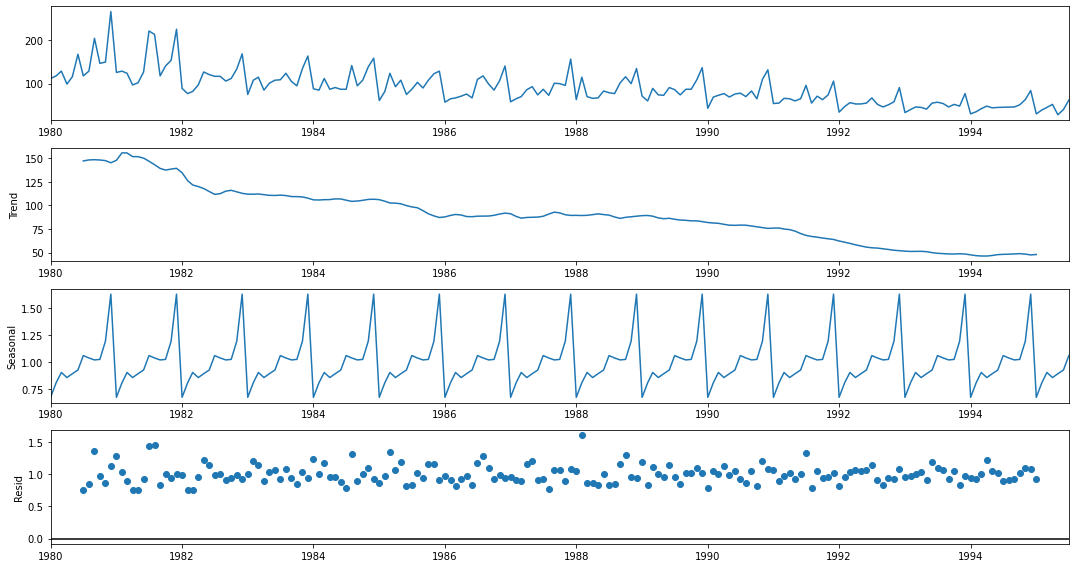

In [16]:
decompositionmr = seasonal_decompose(df,model='multiplicative')
decompositionmr.plot();
plt.savefig('decomposemr.jpg', bbox_inches='tight');

In [17]:
trend = decompositionmr.trend
seasonality = decompositionmr.seasonal
residual = decompositionmr.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

trend.head(12).to_csv('rose_trend_m.csv')
seasonality.head(12).to_csv('rose_season_m.csv')
residual.head(12).to_csv('rose_resid_m.csv')

Trend 
 YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01    147.083333
1980-08-01    148.125000
1980-09-01    148.375000
1980-10-01    148.083333
1980-11-01    147.416667
1980-12-01    145.125000
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    0.670111
1980-02-01    0.806163
1980-03-01    0.901164
1980-04-01    0.854024
1980-05-01    0.889415
1980-06-01    0.923985
1980-07-01    1.058038
1980-08-01    1.035881
1980-09-01    1.017648
1980-10-01    1.022573
1980-11-01    1.192349
1980-12-01    1.628646
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01         NaN
1980-02-01         NaN
1980-03-01         NaN
1980-04-01         NaN
1980-05-01         NaN
1980-06-01         NaN
1980-07-01    0.758258
1980-08-01    0.840720
1980-09-01    1.357674
1980-10-01    0.970771
1980-11-01    0.853378
1980-12-01    1.129646
Name: resid, dtype: fl

<AxesSubplot:xlabel='YearMonth'>

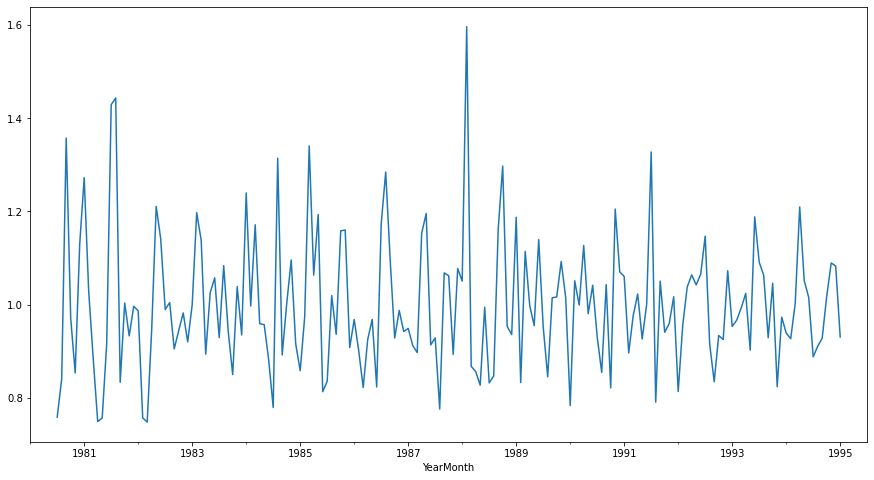

In [18]:
residual.plot()

# Split the data into train and test and plot the training and test data. [Test Data should start from 1991]


In [20]:
rtrain = df[df.index<'1991'] 
rtest = df[df.index>='1991']

In [21]:
print(rtrain.shape)
print(rtest.shape)

(132, 1)
(55, 1)


In [22]:
from IPython.display import display

In [23]:
print('First few rows of Rose Training Data')
display(rtrain.head())
print('Last few rows of Rose Training Data')
display(rtrain.tail())
print('First few rows of Rose Test Data')
display(rtest.head())
print('Last few rows of Rose Test Data')
display(rtest.tail())

rtrain.to_csv('rose_train.csv')
rtest.to_csv('rose_test.csv')

First few rows of Rose Training Data


,Rose
YearMonth,
1980-01-01,112.0
1980-02-01,118.0
1980-03-01,129.0
1980-04-01,99.0
1980-05-01,116.0


Last few rows of Rose Training Data


,Rose
YearMonth,
1990-08-01,70.0
1990-09-01,83.0
1990-10-01,65.0
1990-11-01,110.0
1990-12-01,132.0


First few rows of Rose Test Data


,Rose
YearMonth,
1991-01-01,54.0
1991-02-01,55.0
1991-03-01,66.0
1991-04-01,65.0
1991-05-01,60.0


Last few rows of Rose Test Data


,Rose
YearMonth,
1995-03-01,45.0
1995-04-01,52.0
1995-05-01,28.0
1995-06-01,40.0
1995-07-01,62.0


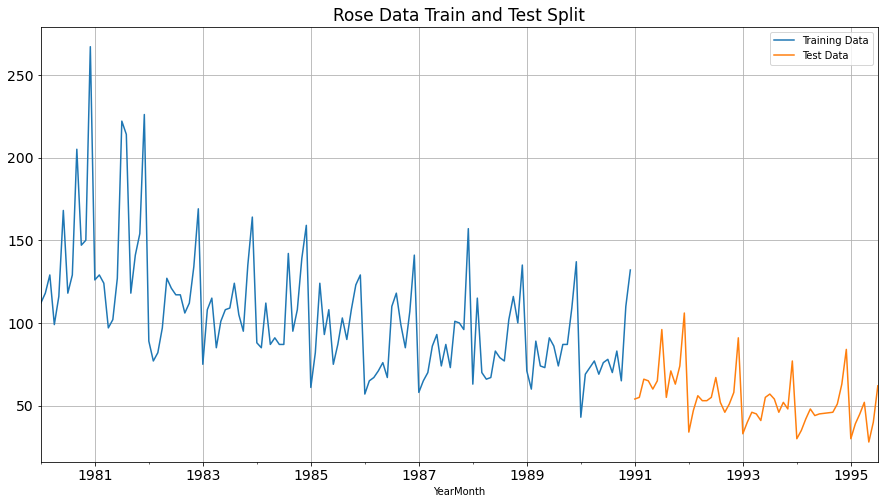

In [24]:
rtrain['Rose'].plot(fontsize=14)
rtest['Rose'].plot(fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.title('Rose Data Train and Test Split', fontsize=17)
plt.savefig('rose_split_ts.jpg', bbox_inches='tight')
plt.show();

In [25]:
train_time = [i+1 for i in range(len(rtrain))]
test_time = [i+133 for i in range(len(rtest))]
print('Training Time Instance :','\n',train_time)
print('Test Time Instance :','\n',test_time)

Training Time Instance : 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time Instance : 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [26]:
LinearRegression_train = rtrain.copy()
LinearRegression_test = rtest.copy()

In [27]:

LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data')
display(LinearRegression_train.head())
print('Last few rows of Training Data')
display(LinearRegression_train.tail())
print('First few rows of Test Data')
display(LinearRegression_test.head())
print('Last few rows of Test Data')
display(LinearRegression_test.tail())

First few rows of Training Data


,Rose,time
YearMonth,,
1980-01-01,112.0,1
1980-02-01,118.0,2
1980-03-01,129.0,3
1980-04-01,99.0,4
1980-05-01,116.0,5


Last few rows of Training Data


,Rose,time
YearMonth,,
1990-08-01,70.0,128
1990-09-01,83.0,129
1990-10-01,65.0,130
1990-11-01,110.0,131
1990-12-01,132.0,132


First few rows of Test Data


,Rose,time
YearMonth,,
1991-01-01,54.0,133
1991-02-01,55.0,134
1991-03-01,66.0,135
1991-04-01,65.0,136
1991-05-01,60.0,137


Last few rows of Test Data


,Rose,time
YearMonth,,
1995-03-01,45.0,183
1995-04-01,52.0,184
1995-05-01,28.0,185
1995-06-01,40.0,186
1995-07-01,62.0,187


In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
lr = LinearRegression()

In [30]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Rose'])

LinearRegression()

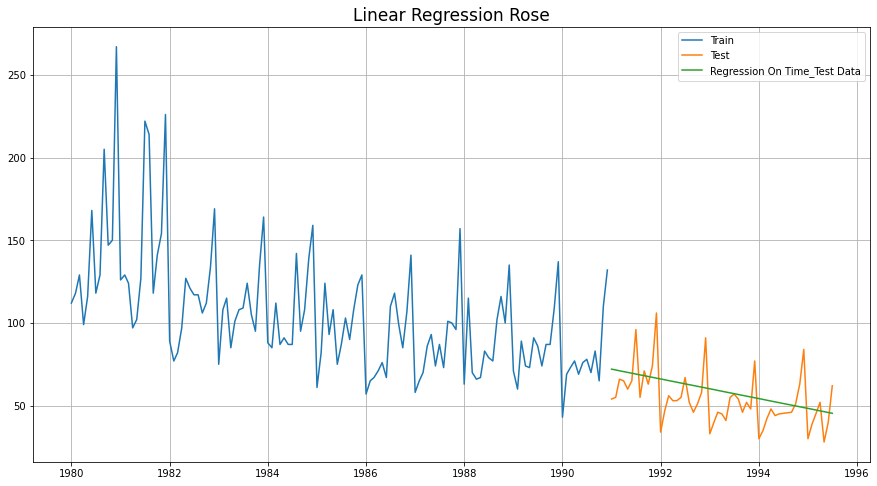

In [31]:
train_predictions_model1         = lr.predict(LinearRegression_train[['time']])
LinearRegression_train['RegOnTime'] = train_predictions_model1

test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.plot(rtrain['Rose'], label='Train')
plt.plot(rtest['Rose'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.title('Linear Regression Rose', fontsize=17)
plt.legend(loc='best')
plt.grid();
plt.savefig('lr_rose.jpg', bbox_inches='tight');

In [32]:
from sklearn import metrics

In [33]:
rmse_model11_test = metrics.mean_squared_error(rtest['Rose'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f " %(rmse_model11_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 15.269 


In [34]:
resultsDf = pd.DataFrame({'Test RMSE Rose': [rmse_model11_test]},index=['RegressionOnTime'])
resultsDf

,Test RMSE Rose
RegressionOnTime,15.268955


# Model 2: Naive Approach Rose : 


In [35]:
NaiveModel_train = rtrain.copy()
NaiveModel_test = rtest.copy()

In [36]:
rtrain.tail()

,Rose
YearMonth,
1990-08-01,70.0
1990-09-01,83.0
1990-10-01,65.0
1990-11-01,110.0
1990-12-01,132.0


In [37]:
NaiveModel_test['naive'] = np.asarray(rtrain['Rose'])[len(np.asarray(rtrain['Rose']))-1]
NaiveModel_test['naive'].head()

YearMonth
1991-01-01    132.0
1991-02-01    132.0
1991-03-01    132.0
1991-04-01    132.0
1991-05-01    132.0
Name: naive, dtype: float64

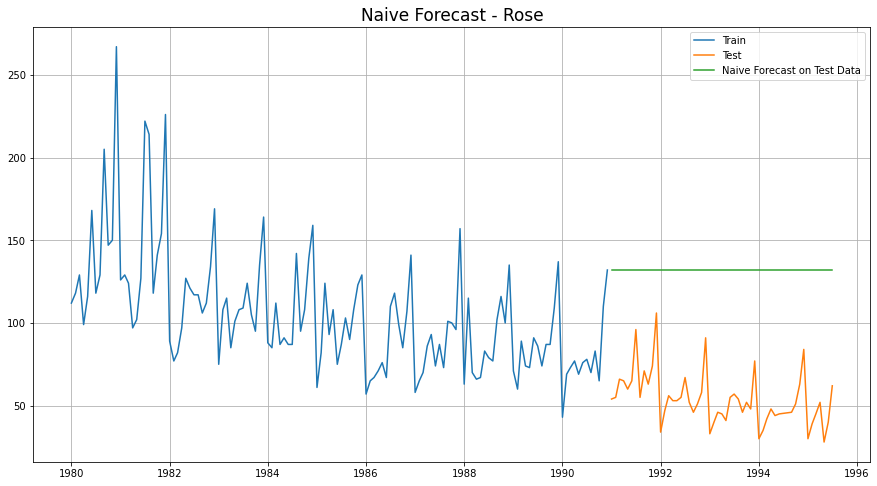

In [39]:
plt.plot(NaiveModel_train['Rose'], label='Train')
plt.plot(rtest['Rose'], label='Test')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.legend(loc='best')
plt.title("Naive Forecast - Rose", fontsize=17)
plt.grid();
plt.savefig('rose_naive.jpg', bbox_inches='tight');

In [40]:
rmse_model21_test = metrics.mean_squared_error(rtest['Rose'],NaiveModel_test['naive'],squared=False)
print("For NaiveModel forecast on the Test Data,  RMSE is %3.3f" %(rmse_model21_test))

For NaiveModel forecast on the Test Data,  RMSE is 79.719


In [50]:
resultsDf_21 = pd.DataFrame({'Test RMSE Rose': [rmse_model21_test]}
                           ,index=['Navie Model'])
resultsDf_21

,Test RMSE Rose
Navie Model,79.718773


# Model 3: Simple Average Rose

In [44]:
SimpleAverage_train = rtrain.copy()
SimpleAverage_test = rtest.copy()

In [45]:
SimpleAverage_test['mean_forecast'] = rtrain['Rose'].mean()
SimpleAverage_test.head()

,Rose,mean_forecast
YearMonth,,
1991-01-01,54.0,104.939394
1991-02-01,55.0,104.939394
1991-03-01,66.0,104.939394
1991-04-01,65.0,104.939394
1991-05-01,60.0,104.939394


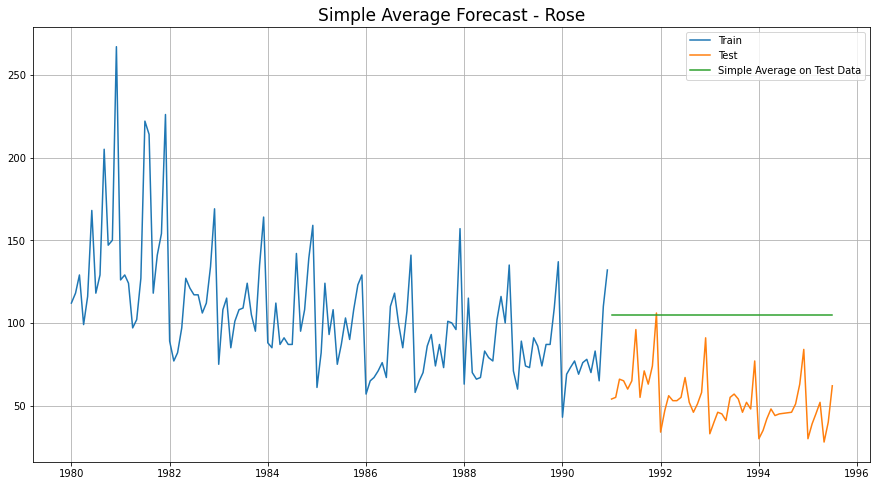

In [46]:
plt.plot(SimpleAverage_train['Rose'], label='Train')
plt.plot(SimpleAverage_test['Rose'], label='Test')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.legend(loc='best')
plt.title("Simple Average Forecast - Rose", fontsize=17)
plt.grid();
plt.savefig('rose_simpleaverage.jpg', bbox_inches='tight');

In [47]:
rmse_model31_test = metrics.mean_squared_error(rtest['Rose'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on Rose Test Data,  RMSE is %3.3f" %(rmse_model31_test))

For Simple Average forecast on Rose Test Data,  RMSE is 53.461


In [48]:
resultsDf_31 = pd.DataFrame({'Test RMSE Rose': [rmse_model31_test]}
                           ,index=['SimpleAverageModel'])
resultsDf_31

,Test RMSE Rose
SimpleAverageModel,53.46057


# Model 4: Moving Average(MA) - Rose

In [51]:
MovingAverage = df.copy()
MovingAverage.head()

,Rose
YearMonth,
1980-01-01,112.0
1980-02-01,118.0
1980-03-01,129.0
1980-04-01,99.0
1980-05-01,116.0


In [52]:
MovingAverage['Trailing_2'] = MovingAverage['Rose'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Rose'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Rose'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Rose'].rolling(9).mean()

MovingAverage.head()

,Rose,Trailing_2,Trailing_4,Trailing_6,Trailing_9
YearMonth,,,,,
1980-01-01,112.0,NaN,NaN,NaN,NaN
1980-02-01,118.0,115.0,NaN,NaN,NaN
1980-03-01,129.0,123.5,NaN,NaN,NaN
1980-04-01,99.0,114.0,114.5,NaN,NaN
1980-05-01,116.0,107.5,115.5,NaN,NaN


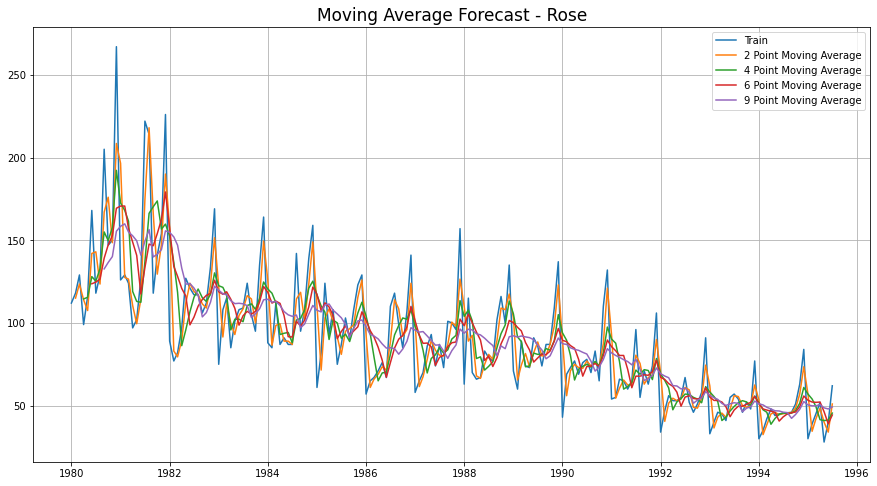

In [53]:
plt.plot(MovingAverage['Rose'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();
plt.title('Moving Average Forecast - Rose', fontsize=17)
plt.savefig('rose_ma.jpg', bbox_inches='tight');

In [54]:
trailing_MovingAverage_train=MovingAverage[MovingAverage.index<'1991'] 
trailing_MovingAverage_test=MovingAverage[MovingAverage.index>='1991']

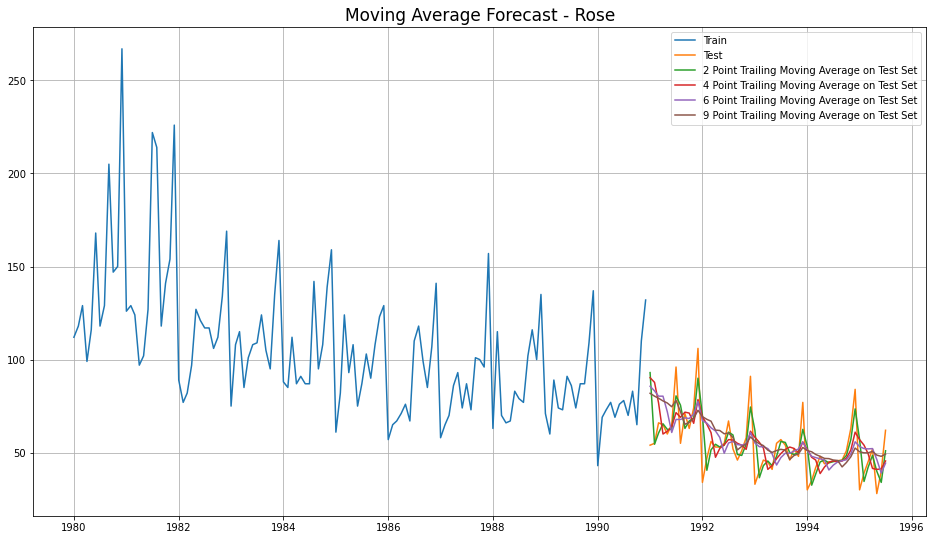

In [55]:
plt.figure(figsize=(16,9))
plt.plot(trailing_MovingAverage_train['Rose'], label='Train')
plt.plot(trailing_MovingAverage_test['Rose'], label='Test')


plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')

plt.legend(loc = 'best')
plt.grid();
plt.title('Moving Average Forecast - Rose', fontsize=17);
plt.savefig('rose_ma_test.jpg', bbox_inches='tight');

In [56]:
rmse_model4_test_2 = metrics.mean_squared_error(rtest['Rose'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on Rose Training Data,  RMSE is %3.3f" %(rmse_model4_test_2))

## Test Data - RMSE --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(rtest['Rose'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on Rose Training Data,  RMSE is %3.3f" %(rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(rtest['Rose'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on Rose Training Data,  RMSE is %3.3f" %(rmse_model4_test_6))

## Test Data - RMSE --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(rtest['Rose'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on Rose Training Data,  RMSE is %3.3f" %(rmse_model4_test_9))

For 2 point Moving Average Model forecast on Rose Training Data,  RMSE is 11.529
For 4 point Moving Average Model forecast on Rose Training Data,  RMSE is 14.451
For 6 point Moving Average Model forecast on Rose Training Data,  RMSE is 14.566
For 9 point Moving Average Model forecast on Rose Training Data,  RMSE is 14.728


In [57]:
resultsDf_41 = pd.DataFrame({'Test RMSE Rose': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf_41.to_csv('rose_ma.csv')
resultsDf_41

,Test RMSE Rose
2pointTrailingMovingAverage,11.529278
4pointTrailingMovingAverage,14.451403
6pointTrailingMovingAverage,14.566327
9pointTrailingMovingAverage,14.727630


In [59]:
train_time = [i+1 for i in range(len(rtrain))]
test_time = [i+133 for i in range(len(rtest))]
LinearRegression_train = rtrain.copy()
LinearRegression_test = rtest.copy()
LinearRegression_test['time'] = test_time
LinearRegression_train['time'] = train_time
lr = LinearRegression()
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Rose'])
test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

# NB on Rose
NaiveModel_train = rtrain.copy()
NaiveModel_test = rtest.copy()
NaiveModel_test['naive'] = np.asarray(rtrain['Rose'])[len(np.asarray(rtrain['Rose']))-1]

# SA on Rose
SimpleAverage_train = rtrain.copy()
SimpleAverage_test = rtest.copy()
SimpleAverage_test['mean_forecast'] = rtrain['Rose'].mean()

# MA on Rose

MovingAverage = df.copy()
MovingAverage['Trailing_2'] = MovingAverage['Rose'].rolling(2).mean()
trailing_MovingAverage_test = MovingAverage[MovingAverage.index>='1991']

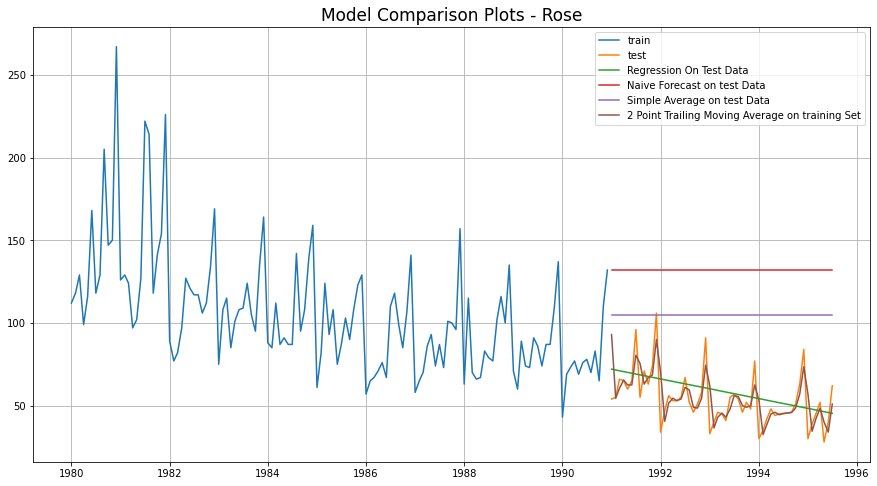

In [60]:
plt.plot(rtrain['Rose'], label='train')
plt.plot(rtest['Rose'], label='test')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Test Data')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on test Data')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on test Data')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on training Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots - Rose", fontsize=17)
plt.grid();


# Simple Exponential Smoothing, Holt's Model (Double Exponential Smoothing) & Holt-Winter's Model (Triple Exponential Smoothing)

In [72]:
import statsmodels.tools.eval_measures as      em
from   sklearn.metrics                 import  mean_squared_error
from   statsmodels.tsa.api             import ExponentialSmoothing, SimpleExpSmoothing, Holt
from   IPython.display                 import display
from   pylab                           import rcParams

In [73]:
model_SES = SimpleExpSmoothing(rtrain,initialization_method='estimated' )

C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [74]:
model_SES_autofit = model_SES.fit(optimized=True)

In [75]:
model_SES_autofit.params

{'smoothing_level': 0.09874983698117956,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 134.38702481818487,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [76]:
SES_predict_rose = model_SES_autofit.forecast(steps=len(rtest))
SES_predict_rose

1991-01-01    87.104997
1991-02-01    87.104997
1991-03-01    87.104997
1991-04-01    87.104997
1991-05-01    87.104997
1991-06-01    87.104997
1991-07-01    87.104997
1991-08-01    87.104997
1991-09-01    87.104997
1991-10-01    87.104997
1991-11-01    87.104997
1991-12-01    87.104997
1992-01-01    87.104997
1992-02-01    87.104997
1992-03-01    87.104997
1992-04-01    87.104997
1992-05-01    87.104997
1992-06-01    87.104997
1992-07-01    87.104997
1992-08-01    87.104997
1992-09-01    87.104997
1992-10-01    87.104997
1992-11-01    87.104997
1992-12-01    87.104997
1993-01-01    87.104997
1993-02-01    87.104997
1993-03-01    87.104997
1993-04-01    87.104997
1993-05-01    87.104997
1993-06-01    87.104997
1993-07-01    87.104997
1993-08-01    87.104997
1993-09-01    87.104997
1993-10-01    87.104997
1993-11-01    87.104997
1993-12-01    87.104997
1994-01-01    87.104997
1994-02-01    87.104997
1994-03-01    87.104997
1994-04-01    87.104997
1994-05-01    87.104997
1994-06-01    87

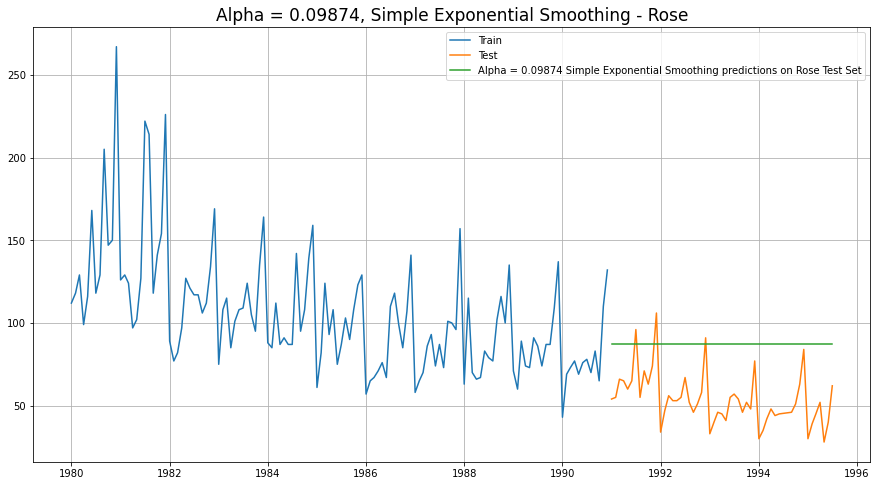

In [77]:
plt.plot(rtrain, label='Train')
plt.plot(rtest, label='Test')

plt.plot(SES_predict_rose, label='Alpha = 0.09874 Simple Exponential Smoothing predictions on Rose Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha = 0.09874, Simple Exponential Smoothing - Rose', fontsize=17);
plt.savefig('rose_ses.jpg', bbox_inches='tight');

In [78]:
def MAPE(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

In [79]:
print('SES RMSE:',mean_squared_error(rtest.values,SES_predict_rose.values,squared=False))
print('SES RMSE (calculated using statsmodels):',em.rmse(rtest.values,SES_predict_rose.values)[0])

SES RMSE: 36.79624054770398
SES RMSE (calculated using statsmodels): 36.796240547703974


In [80]:
resultsDf_rses = pd.DataFrame({'Test RMSE Rose': [em.rmse(rtest.values,SES_predict_rose.values)[0]]},index=['Simple Exponential Smoothing'])
resultsDf_rses

,Test RMSE Rose
Simple Exponential Smoothing,36.796241


# Holt - ETS(A, A, N) - Holt's linear method with additive errors - Rose
Double Exponential Smoothing - Rose
One of the drawbacks of the simple exponential smoothing is that the model does not do well in the presence of the trend.
This model is an extension of SES known as Double Exponential model which estimates two smoothing parameters.
Applicable when data has Trend but no seasonality.
Two separate components are considered: Level and Trend.
Level is the local mean.
One smoothing parameter α corresponds to the level series
A second smoothing parameter β corresponds to the trend series.

In [81]:
# Initializing the Double Exponential Smoothing Model
model_DES = Holt(rtrain,initialization_method='estimated')
# Fitting the model
model_DES = model_DES.fit()

print('')
print('Holt model Exponential Smoothing Estimated Parameters :')
print('')
print(model_DES.params)


Holt model Exponential Smoothing Estimated Parameters :

{'smoothing_level': 1.4901161193847656e-08, 'smoothing_trend': 1.6610391146660035e-10, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 137.81553690867275, 'initial_trend': -0.4943781897068274, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [82]:
DES_predict_rose =  model_DES.forecast(len(rtest))
DES_predict_rose

1991-01-01    72.063238
1991-02-01    71.568859
1991-03-01    71.074481
1991-04-01    70.580103
1991-05-01    70.085725
1991-06-01    69.591347
1991-07-01    69.096969
1991-08-01    68.602590
1991-09-01    68.108212
1991-10-01    67.613834
1991-11-01    67.119456
1991-12-01    66.625078
1992-01-01    66.130699
1992-02-01    65.636321
1992-03-01    65.141943
1992-04-01    64.647565
1992-05-01    64.153187
1992-06-01    63.658808
1992-07-01    63.164430
1992-08-01    62.670052
1992-09-01    62.175674
1992-10-01    61.681296
1992-11-01    61.186918
1992-12-01    60.692539
1993-01-01    60.198161
1993-02-01    59.703783
1993-03-01    59.209405
1993-04-01    58.715027
1993-05-01    58.220648
1993-06-01    57.726270
1993-07-01    57.231892
1993-08-01    56.737514
1993-09-01    56.243136
1993-10-01    55.748757
1993-11-01    55.254379
1993-12-01    54.760001
1994-01-01    54.265623
1994-02-01    53.771245
1994-03-01    53.276866
1994-04-01    52.782488
1994-05-01    52.288110
1994-06-01    51

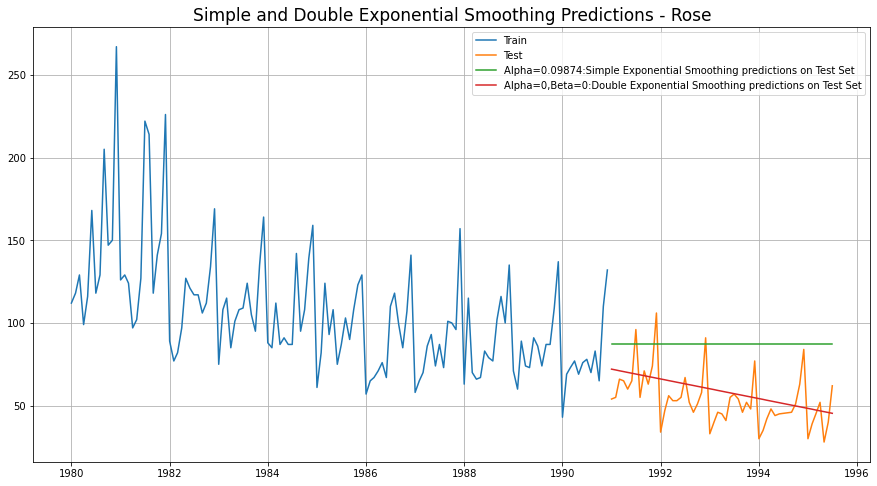

In [83]:
plt.plot(rtrain, label='Train')
plt.plot(rtest, label='Test')

plt.plot(SES_predict_rose, label='Alpha=0.09874:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict_rose, label='Alpha=0,Beta=0:Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple and Double Exponential Smoothing Predictions - Rose', fontsize=17);
plt.savefig('rose_rdes.jpg', bbox_inches='tight');

In [84]:
print('DES RMSE:',mean_squared_error(rtest.values,DES_predict_rose.values,squared=False))

DES RMSE: 15.268943764436564


In [85]:
resultsDf_temp = pd.DataFrame({'Test RMSE Rose': [mean_squared_error(rtest.values,DES_predict_rose.values,squared=False)]}
                           ,index=['Double Exponential Smoothing'])

# resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf_temp

,Test RMSE Rose
Double Exponential Smoothing,15.268944


# Holt-Winters - ETS(A, A, A) - Holt Winter's linear method with additive errors - ROSE

In [86]:
model_TES = ExponentialSmoothing(rtrain,trend='additive',seasonal='additive',initialization_method='estimated')
# Fitting the model
model_TES = model_TES.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES.params)

C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'



==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.08954054664605082, 'smoothing_trend': 0.0002400108693915795, 'smoothing_seasonal': 0.003466872515750747, 'damping_trend': nan, 'initial_level': 146.5570157826235, 'initial_trend': -0.547196983509005, 'initial_seasons': array([-31.17478463, -18.74839869, -10.76961776, -21.36741017,
       -12.63775539,  -7.27430333,   2.61279801,   8.69603625,
         4.79381122,   2.96110122,  21.05738849,  63.18279918]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [87]:
TES_predict_add_rose =  model_TES.forecast(len(rtest))
TES_predict_add_rose

1991-01-01     42.684928
1991-02-01     54.564005
1991-03-01     61.995209
1991-04-01     50.852018
1991-05-01     59.034271
1991-06-01     63.850901
1991-07-01     73.190805
1991-08-01     78.724624
1991-09-01     74.276280
1991-10-01     71.895000
1991-11-01     89.444365
1991-12-01    131.042724
1992-01-01     36.119272
1992-02-01     47.998349
1992-03-01     55.429553
1992-04-01     44.286362
1992-05-01     52.468615
1992-06-01     57.285245
1992-07-01     66.625149
1992-08-01     72.158968
1992-09-01     67.710624
1992-10-01     65.329344
1992-11-01     82.878709
1992-12-01    124.477068
1993-01-01     29.553616
1993-02-01     41.432693
1993-03-01     48.863898
1993-04-01     37.720706
1993-05-01     45.902959
1993-06-01     50.719589
1993-07-01     60.059493
1993-08-01     65.593312
1993-09-01     61.144968
1993-10-01     58.763688
1993-11-01     76.313053
1993-12-01    117.911412
1994-01-01     22.987961
1994-02-01     34.867037
1994-03-01     42.298242
1994-04-01     31.155050


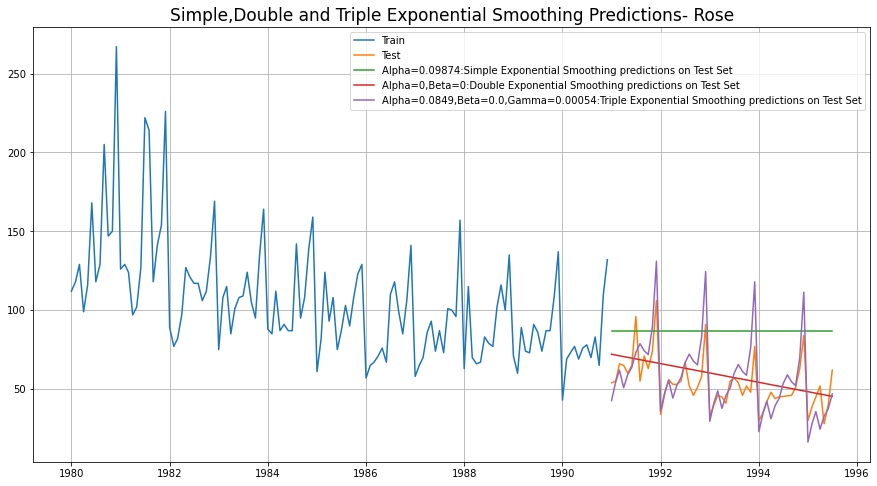

In [88]:
plt.plot(rtrain, label='Train')
plt.plot(rtest, label='Test')

plt.plot(SES_predict_rose, label='Alpha=0.09874:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict_rose, label='Alpha=0,Beta=0:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_add_rose, label='Alpha=0.0849,Beta=0.0,Gamma=0.00054:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions- Rose', fontsize=17);
plt.savefig('rose_add_tes.jpg', bbox_inches='tight');

In [89]:
print('TES RMSE:',mean_squared_error(rtest.values,TES_predict_add_rose.values,squared=False))

TES RMSE: 14.249660750768982


In [90]:
resultsDf_temp = pd.DataFrame({'Test RMSE Rose': [mean_squared_error(rtest.values,TES_predict_add_rose.values,squared=False)]}
                           ,index=['Triple Exponential Smoothing (Additive Season)'])

import textwrap
textwrap.TextWrapper(resultsDf_temp.index)

# resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf_temp

,Test RMSE Rose
Triple Exponential Smoothing (Additive Season),14.249661


Inference
Triple Exponential Smoothing has performed the best on the test as expected since the data had both trend and seasonality.

# Holt-Winters - ETS(A, A, M) - Holt Winter's linear method - ROSE
ETS(A, A, M) model - Taking MULTIPLICATIVE SEASONALITY

In [91]:
# Initializing the Double Exponential Smoothing Model
model_TES_am = ExponentialSmoothing(rtrain,trend='add',seasonal='multiplicative',initialization_method='estimated')
# Fitting the model
model_TES_am = model_TES_am.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES_am.params)

C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'



==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.0715106306609405, 'smoothing_trend': 0.04529179757535142, 'smoothing_seasonal': 7.244325029450242e-05, 'damping_trend': nan, 'initial_level': 130.40839142502193, 'initial_trend': -0.77985743179386, 'initial_seasons': array([0.86218996, 0.977675  , 1.0687727 , 0.93403881, 1.050625  ,
       1.14410977, 1.25836944, 1.33937772, 1.26778766, 1.24131254,
       1.44724625, 1.99553681]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [92]:
TES_predict_am_rose =  model_TES_am.forecast(len(rtest))
TES_predict_am_rose

1991-01-01     56.321655
1991-02-01     63.664690
1991-03-01     69.374024
1991-04-01     60.435528
1991-05-01     67.758341
1991-06-01     73.546478
1991-07-01     80.630117
1991-08-01     85.541323
1991-09-01     80.707713
1991-10-01     78.764555
1991-11-01     91.531230
1991-12-01    125.788433
1992-01-01     54.168902
1992-02-01     61.223492
1992-03-01     66.705377
1992-04-01     58.103246
1992-05-01     65.135026
1992-06-01     70.689855
1992-07-01     77.488188
1992-08-01     82.197159
1992-09-01     77.542202
1992-10-01     75.665128
1992-11-01     87.917577
1992-12-01    120.805914
1993-01-01     52.016149
1993-02-01     58.782294
1993-03-01     64.036730
1993-04-01     55.770964
1993-05-01     62.511711
1993-06-01     67.833232
1993-07-01     74.346259
1993-08-01     78.852995
1993-09-01     74.376691
1993-10-01     72.565700
1993-11-01     84.303925
1993-12-01    115.823395
1994-01-01     49.863396
1994-02-01     56.341097
1994-03-01     61.368082
1994-04-01     53.438682


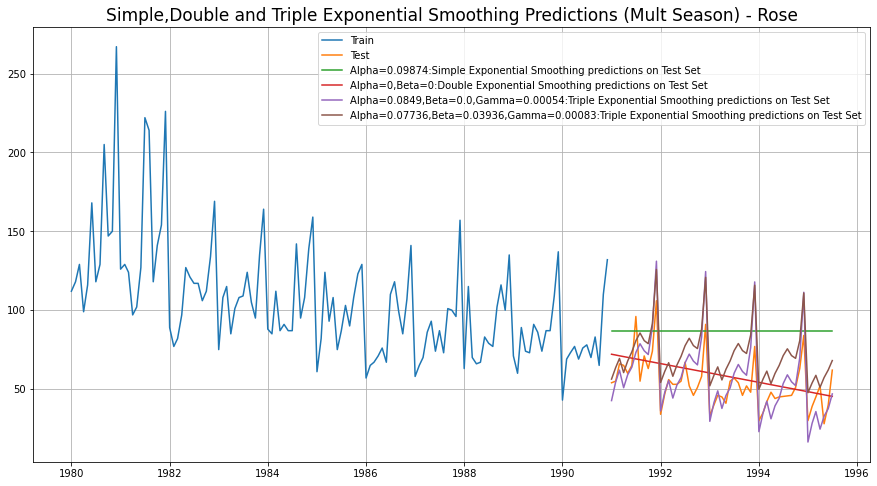

In [93]:
plt.plot(rtrain, label='Train')
plt.plot(rtest, label='Test')

plt.plot(SES_predict_rose, label='Alpha=0.09874:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict_rose, label='Alpha=0,Beta=0:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_add_rose, label='Alpha=0.0849,Beta=0.0,Gamma=0.00054:Triple Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_am_rose, label='Alpha=0.07736,Beta=0.03936,Gamma=0.00083:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions (Mult Season) - Rose', fontsize=17);

plt.savefig('rose_mul_tes.jpg', bbox_inches='tight');

In [94]:
print('TES_am RMSE_rose:',mean_squared_error(rtest.values,TES_predict_am_rose.values,squared=False))

TES_am RMSE_rose: 20.156762582665337


In [95]:
resultsDf_temp = pd.DataFrame({'Test RMSE Rose': [mean_squared_error(rtest.values,TES_predict_am_rose.values,squared=False)]}
                           ,index=['Triple Exponential Smoothing (Multiplicative Season)'])



resultsDf_temp

,Test RMSE Rose
Triple Exponential Smoothing (Multiplicative Season),20.156763


We see that the multiplicative seasonality model has not done that well when compared to the additive seasonality Triple Exponential Smoothing model.

# Holt-Winters - ETS(A, Ad, A) - Holt Winter's linear method with additive errors - ROSE
USING DAMPED TREND

In [96]:
# Initializing the Double Exponential Smoothing Model
model_TES = ExponentialSmoothing(rtrain,trend='additive',seasonal='additive',initialization_method='estimated', damped_trend=True)
# Fitting the model
model_TES = model_TES.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.07368619699755712, 'smoothing_trend': 0.009797991128366655, 'smoothing_seasonal': 0.07330138329105369, 'damping_trend': 0.9756260777932113, 'initial_level': 154.92183119579653, 'initial_trend': -1.5746552369872022, 'initial_seasons': array([-30.47551091, -18.83938002, -10.75861958, -22.3615668 ,
       -12.99160054,  -6.55422732,   3.90246506,  10.59629087,
         6.04147917,   3.40128252,  21.45637051,  66.2302775 ]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [97]:
TES_predict_add_damp_rose =  model_TES.forecast(len(rtest))
TES_predict_add_damp_rose

1991-01-01     48.344380
1991-02-01     60.974057
1991-03-01     68.394566
1991-04-01     58.217248
1991-05-01     65.897567
1991-06-01     70.871897
1991-07-01     80.535628
1991-08-01     85.891835
1991-09-01     83.333132
1991-10-01     81.304062
1991-11-01     99.375426
1991-12-01    141.365521
1992-01-01     47.183518
1992-02-01     59.841490
1992-03-01     67.289603
1992-04-01     57.139218
1992-05-01     64.845813
1992-06-01     69.845778
1992-07-01     79.534519
1992-08-01     84.915127
1992-09-01     82.380231
1992-10-01     80.374387
1992-11-01     98.468411
1992-12-01    140.480613
1993-01-01     46.320179
1993-02-01     58.999193
1993-03-01     66.467837
1993-04-01     56.337482
1993-05-01     64.063618
1993-06-01     69.082649
1993-07-01     78.789990
1993-08-01     84.188745
1993-09-01     81.671554
1993-10-01     79.682983
1993-11-01     97.793858
1993-12-01    139.822503
1994-01-01     45.678109
1994-02-01     58.372773
1994-03-01     65.856685
1994-04-01     55.741226


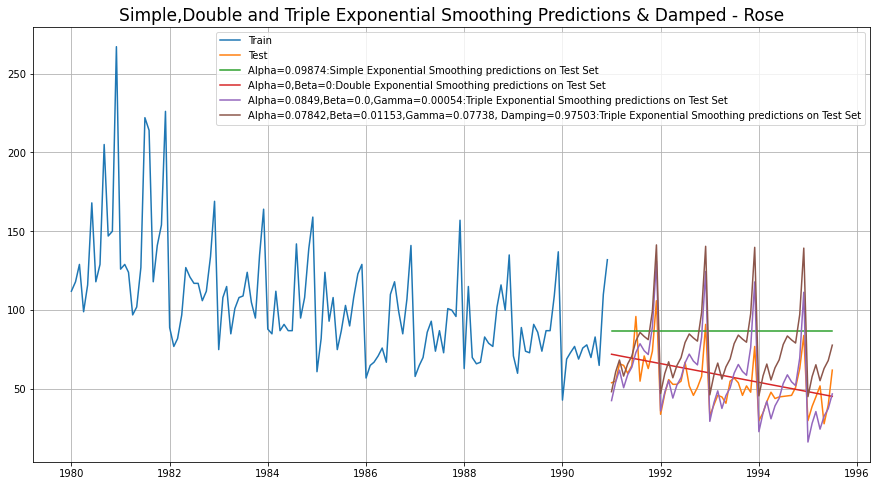

In [98]:
plt.plot(rtrain, label='Train')
plt.plot(rtest, label='Test')

plt.plot(SES_predict_rose, label='Alpha=0.09874:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict_rose, label='Alpha=0,Beta=0:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_add_rose, label='Alpha=0.0849,Beta=0.0,Gamma=0.00054:Triple Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_add_damp_rose, label='Alpha=0.07842,Beta=0.01153,Gamma=0.07738, Damping=0.97503:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions & Damped - Rose', fontsize=17);
plt.savefig('rose_add_damp_tes.jpg', bbox_inches='tight');

In [99]:
print('TES RMSE DAMPED ROSE:',mean_squared_error(rtest.values,TES_predict_add_damp_rose.values,squared=False))

TES RMSE DAMPED ROSE: 26.360083280893402


In [100]:
resultsDf_temp = pd.DataFrame({'Test RMSE Rose': [mean_squared_error(rtest.values,TES_predict_add_damp_rose.values,squared=False)]}
                           ,index=['Triple Exponential Smoothing (Additive Season, Damped Trend)'])

import textwrap
textwrap.TextWrapper(resultsDf_temp.index)

# resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf_temp

,Test RMSE Rose
"Triple Exponential Smoothing (Additive Season, Damped Trend)",26.360083


# Holt-Winters - ETS(A, A, M) - Holt Winter's linear method - ROSE
USING DAMPED TREND
ETS(A, Ad, M) model - Taking MULTIPLICATIVE SEASONALITY

In [101]:
# Initializing the Double Exponential Smoothing Model
model_TES_am = ExponentialSmoothing(rtrain,trend='add',seasonal='multiplicative',initialization_method='estimated', damped_trend=True)
# Fitting the model
model_TES_am = model_TES_am.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES_am.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 7.339815646826097e-07, 'smoothing_trend': 3.874477577718832e-07, 'smoothing_seasonal': 5.495855487816384e-07, 'damping_trend': 0.9795710334671273, 'initial_level': 202.0316191169019, 'initial_trend': -2.296661268088203, 'initial_seasons': array([0.57958528, 0.65901604, 0.71880369, 0.62986019, 0.70479456,
       0.76518152, 0.83850031, 0.89018724, 0.8566111 , 0.83178635,
       0.9685935 , 1.32823642]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [102]:
TES_predict_am_damp_rose =  model_TES_am.forecast(len(rtest))
TES_predict_am_damp_rose

1991-01-01     57.367639
1991-02-01     65.134514
1991-03-01     70.941931
1991-04-01     62.076370
1991-05-01     69.365836
1991-06-01     75.207281
1991-07-01     82.304264
1991-08-01     87.264007
1991-09-01     83.865446
1991-10-01     81.333110
1991-11-01     94.594046
1991-12-01    129.561042
1992-01-01     56.468121
1992-02-01     64.132613
1992-03-01     69.871459
1992-04-01     61.157519
1992-05-01     68.358675
1992-06-01     74.136164
1992-07-01     81.154492
1992-08-01     86.068298
1992-09-01     82.738342
1992-10-01     80.261028
1992-11-01     93.371138
1992-12-01    127.918322
1993-01-01     55.765952
1993-02-01     63.350525
1993-03-01     69.035844
1993-04-01     60.440260
1993-05-01     67.572479
1993-06-01     73.300045
1993-07-01     80.256975
1993-08-01     85.134921
1993-09-01     81.858519
1993-10-01     79.424155
1993-11-01     92.416530
1993-12-01    126.636007
1994-01-01     55.217836
1994-02-01     62.740022
1994-03-01     68.383559
1994-04-01     59.880364


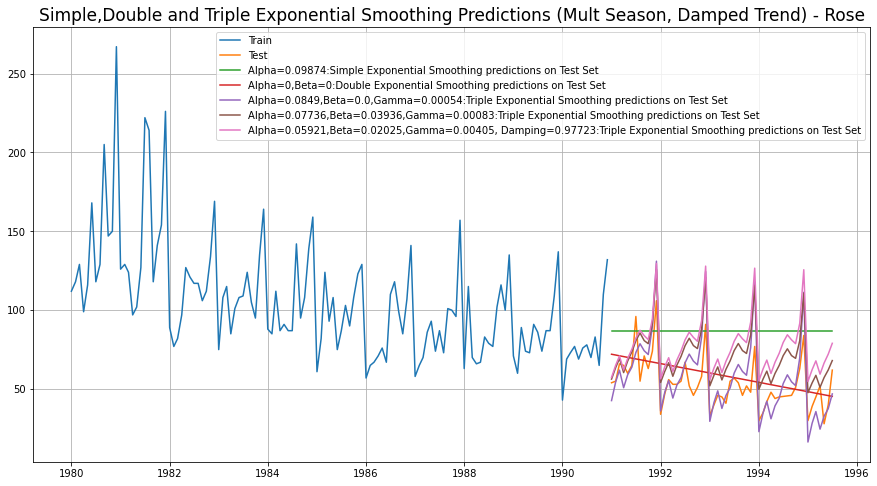

In [103]:
plt.plot(rtrain, label='Train')
plt.plot(rtest, label='Test')

plt.plot(SES_predict_rose, label='Alpha=0.09874:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict_rose, label='Alpha=0,Beta=0:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_add_rose, label='Alpha=0.0849,Beta=0.0,Gamma=0.00054:Triple Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_am_rose, label='Alpha=0.07736,Beta=0.03936,Gamma=0.00083:Triple Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_am_damp_rose, label='Alpha=0.05921,Beta=0.02025,Gamma=0.00405, Damping=0.97723:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions (Mult Season, Damped Trend) - Rose', fontsize=17);

plt.savefig('rose_mul_damp_tes.jpg', bbox_inches='tight');

In [104]:
print('TES_am RMSE_rose DAMPED:',mean_squared_error(rtest.values,TES_predict_am_damp_rose.values,squared=False))

TES_am RMSE_rose DAMPED: 25.955974115109736


In [105]:
resultsDf_temp = pd.DataFrame({'Test RMSE Rose': [mean_squared_error(rtest.values,TES_predict_am_damp_rose.values,squared=False)]}
                           ,index=['Triple Exponential Smoothing (Multiplicative Season, Damped Trend)'])



resultsDf_temp


,Test RMSE Rose
"Triple Exponential Smoothing (Multiplicative Season, Damped Trend)",25.955974


# Best Model for Rose till Now - 2 Pt Moving Average

In [107]:
MovingAverage = df.copy()
MovingAverage.head()

,Rose
YearMonth,
1980-01-01,112.0
1980-02-01,118.0
1980-03-01,129.0
1980-04-01,99.0
1980-05-01,116.0


In [108]:
MovingAverage['Trailing_2'] = MovingAverage['Rose'].rolling(2).mean()

MovingAverage.head()

,Rose,Trailing_2
YearMonth,,
1980-01-01,112.0,NaN
1980-02-01,118.0,115.0
1980-03-01,129.0,123.5
1980-04-01,99.0,114.0
1980-05-01,116.0,107.5


In [109]:
trailing_MovingAverage_train=MovingAverage[MovingAverage.index<'1991'] 
trailing_MovingAverage_test=MovingAverage[MovingAverage.index>='1991']

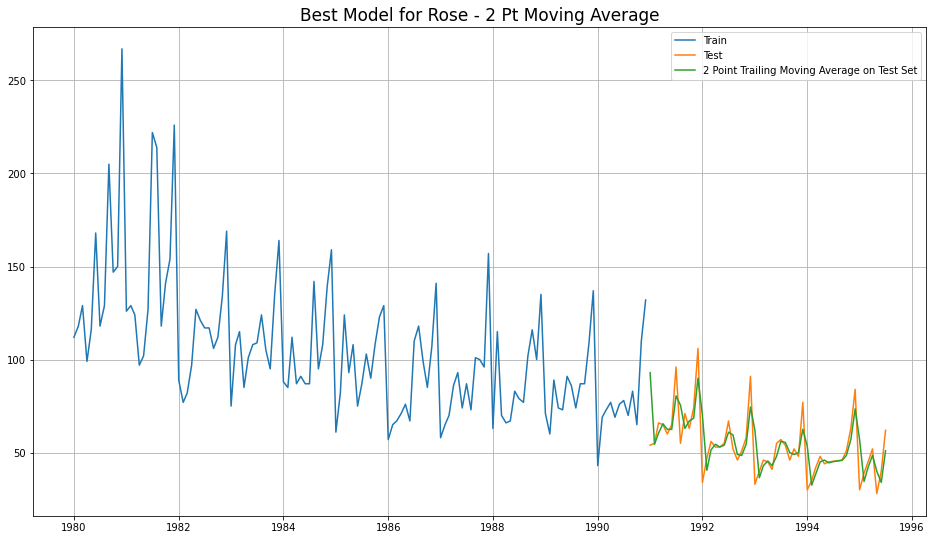

In [110]:
plt.figure(figsize=(16,9))
plt.plot(trailing_MovingAverage_train['Rose'], label='Train')
plt.plot(trailing_MovingAverage_test['Rose'], label='Test')


plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')


plt.legend(loc = 'best')
plt.grid();
plt.title('Best Model for Rose - 2 Pt Moving Average', fontsize=17);
plt.savefig('rose_best_model_2pt.jpg', bbox_inches='tight');

# Check Stationarity of ROSE Data
The Augmented Dickey-Fuller test is an unit root test which determines whether there is a unit root and subsequently whether the series is non-stationary.

The hypothesis in a simple form for the ADF test is:

 H0: The Time Series has a unit root and is thus non-stationary.
 H1: The Time Series does not have a unit root and is thus stationary.

We would want the series to be stationary for building ARIMA models and thus we would want the p-value of this test to be less than the alpha value.

In [112]:
from statsmodels.tsa.stattools import adfuller

In [114]:
dfrs = adfuller(df,regression='ct')
print('DF test statistic is %3.3f' %dfrs[0])
print('DF test p-value is' ,dfrs[1])
print('Number of lags used' ,dfrs[2])

DF test statistic is -2.240
DF test p-value is 0.4671371627793097
Number of lags used 13


We see that at 5% significant level the Time Series is non-stationary.

Let us take one level of differencing to see whether the series becomes stationary.

In [115]:
dfrs = adfuller(df.diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %dfrs[0])
print('DF test p-value is' ,dfrs[1])
print('Number of lags used' ,dfrs[2])

DF test statistic is -8.162
DF test p-value is 3.015976115826694e-11
Number of lags used 12


We see that p-value < alpha=0.05 Hence, we reject the Null Hypothesis

We conclude that with a lag 1 - now the Rose data is Stationary

Now, let us go ahead and plot the stationary series.

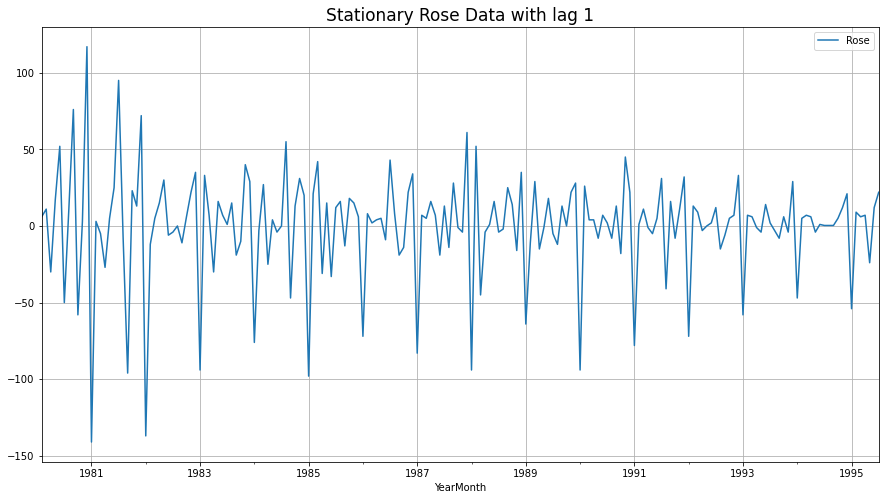

In [116]:
df.diff().dropna().plot(grid=True);
plt.title('Stationary Rose Data with lag 1', fontsize=17);
plt.savefig('rose_stationary.jpg', bbox_inches='tight');

# ARIMA / SARIMA on ROSE
Check for Stationarity of Rose Train Data
Let us plot the training data once.

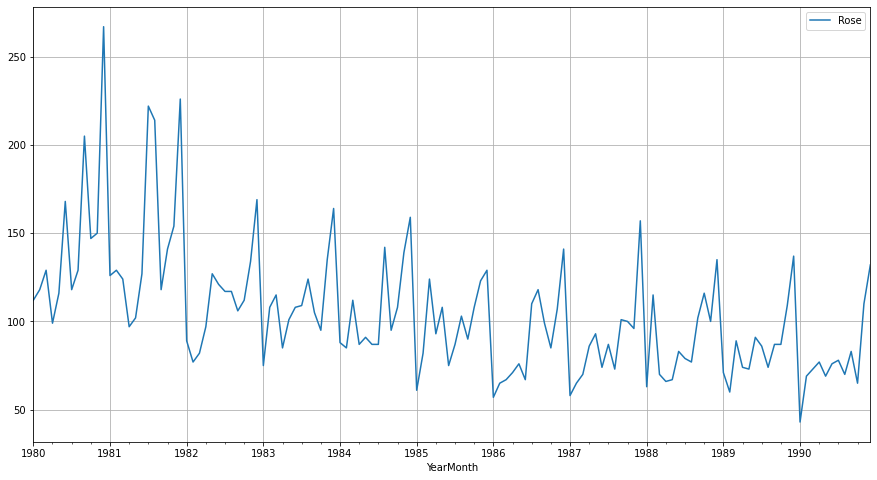

In [117]:
rtrain.plot(grid=True);

In [118]:
dftest = adfuller(rtrain,regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -1.686
DF test p-value is 0.7569093051047063
Number of lags used 13


In [119]:
dftest = adfuller(rtrain.diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -6.804
DF test p-value is 3.8948313567816136e-08
Number of lags used 12


p-value < 0.05 ------> So at 95% Confidence Interval. Train Rose data is Stationary with lag 1 Now, let us go ahead and plot the differenced training data.

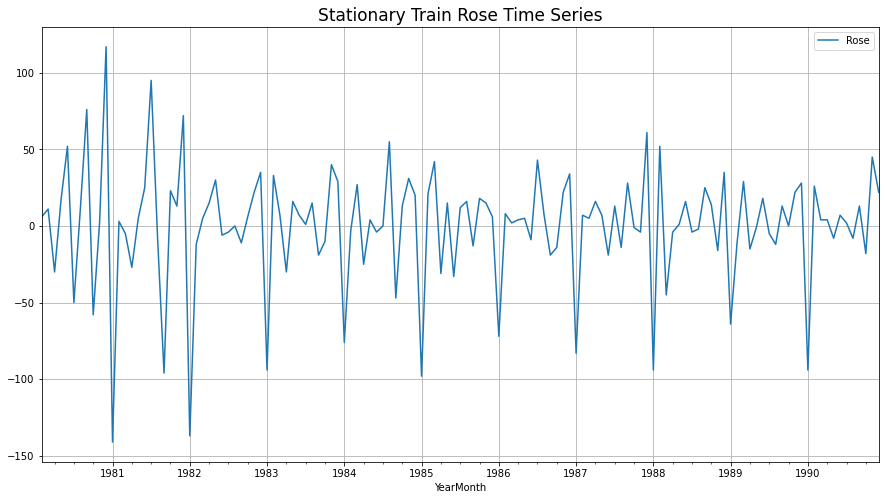

In [120]:
rtrain.diff().dropna().plot(grid=True);
plt.title('Stationary Train Rose Time Series', fontsize=17)
plt.savefig('rose_train_stationary.jpg', bbox_inches='tight');

In [121]:
rtrain.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 132 entries, 1980-01-01 to 1990-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rose    132 non-null    float64
dtypes: float64(1)
memory usage: 2.1 KB


# Build an Automated version of an ARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

Note: The data has some seasonality so ideally we should build a SARIMA model. But lets test on the lowest Akaike Information Criteria, which one suits best - ARIMA or SARIMA

In [122]:
import itertools

p = q = range(0, 4)
d= range(1,2)
pdq = list(itertools.product(p, d, q))

print('Examples of the parameter combinations for the Model')

for i in range(0,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Examples of the parameter combinations for the Model
Model: (0, 1, 0)
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)


In [123]:
ROSE_ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ROSE_ARIMA_AIC

,param,AIC


In [124]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:# running a loop within the pdq parameters defined by itertools
    ARIMA_model = ARIMA(rtrain['Rose'].values,order=param).fit()#fitting the ARIMA model
    #using the parameters from the loop
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))#printing the parameters and the AIC
    #from the fitted models
    ROSE_ARIMA_AIC = ROSE_ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
    #appending the AIC values and the model parameters to the previously created data frame
    #for easier understanding and sorting of the AIC values

ARIMA(0, 1, 0) - AIC:1333.1546729124348
ARIMA(0, 1, 1) - AIC:1282.3098319748312
ARIMA(0, 1, 2) - AIC:1279.6715288535818
ARIMA(0, 1, 3) - AIC:1280.5453761734655
ARIMA(1, 1, 0) - AIC:1317.3503105381492
ARIMA(1, 1, 1) - AIC:1280.5742295380032
ARIMA(1, 1, 2) - AIC:1279.870723423191
ARIMA(1, 1, 3) - AIC:1281.8707223310003
ARIMA(2, 1, 0) - AIC:1298.6110341605004
ARIMA(2, 1, 1) - AIC:1281.5078621868474
ARIMA(2, 1, 2) - AIC:1281.8707222264284


C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 3) - AIC:1274.6949119626274
ARIMA(3, 1, 0) - AIC:1297.48109172717
ARIMA(3, 1, 1) - AIC:1282.4192776271977


C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(3, 1, 2) - AIC:1283.720740597716
ARIMA(3, 1, 3) - AIC:1278.6588655941036


C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [125]:
ROSE_ARIMA_AIC.sort_values(by='AIC',ascending=True).head()

,param,AIC
11,"(2, 1, 3)",1274.694912
15,"(3, 1, 3)",1278.658866
2,"(0, 1, 2)",1279.671529
6,"(1, 1, 2)",1279.870723
3,"(0, 1, 3)",1280.545376


In [126]:
auto_ARIMA = ARIMA(rtrain, order=(2,1,3))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  132
Model:                 ARIMA(2, 1, 3)   Log Likelihood                -631.347
Date:                Sun, 22 May 2022   AIC                           1274.695
Time:                        10:38:41   BIC                           1291.946
Sample:                    01-01-1980   HQIC                          1281.705
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6781      0.084    -20.035      0.000      -1.842      -1.514
ar.L2         -0.7289      0.084     -8.703      0.000      -0.893      -0.565
ma.L1          1.0450      0.685      1.527      0.1

C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


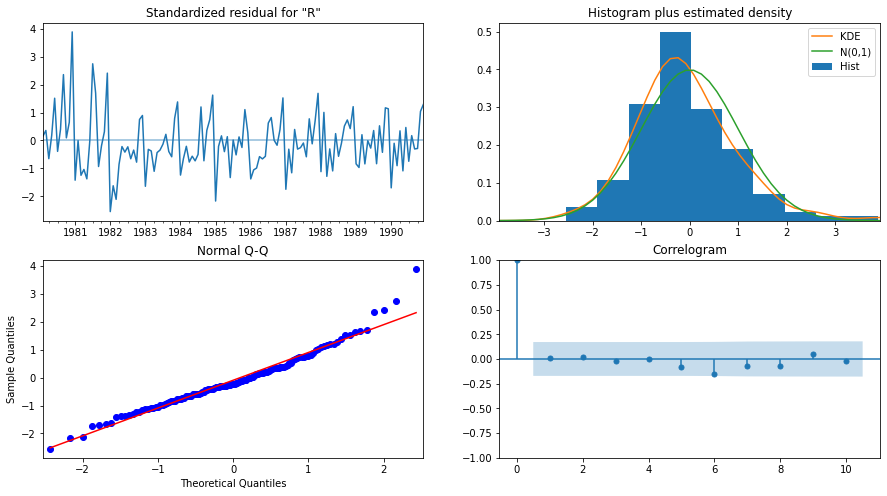

In [127]:
results_auto_ARIMA.plot_diagnostics();

plt.savefig('rose_diag_plot.jpg', bbox_inches='tight')

# Predict on the Rose Test Set using this model and evaluate the model.

In [128]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(rtest))
predicted_auto_ARIMA

1991-01-01    85.615051
1991-02-01    90.533276
1991-03-01    81.974358
1991-04-01    92.751980
1991-05-01    80.904894
1991-06-01    92.929416
1991-07-01    81.386670
1991-08-01    91.991628
1991-09-01    82.609183
1991-10-01    90.623711
1991-11-01    84.013564
1991-12-01    89.264124
1992-01-01    85.271403
1992-02-01    88.144373
1992-03-01    86.233594
1992-04-01    87.345928
1992-05-01    86.872108
1992-06-01    86.856438
1992-07-01    87.228099
1992-08-01    86.615846
1992-09-01    87.372349
1992-10-01    86.549150
1992-11-01    87.379127
1992-12-01    86.586390
1993-01-01    87.311694
1993-02-01    86.672403
1993-03-01    87.216510
1993-04-01    86.769435
1993-05-01    87.123063
1993-06-01    86.855520
1993-07-01    87.046719
1993-08-01    86.920884
1993-09-01    86.992680
1993-10-01    86.963921
1993-11-01    86.959849
1993-12-01    86.987645
1994-01-01    86.943969
1994-02-01    86.997000
1994-03-01    86.939846
1994-04-01    86.997101
1994-05-01    86.942682
1994-06-01    86

In [129]:
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

## Importing the mean_squared_error function from sklearn to calculate the RMSE

from sklearn.metrics import mean_squared_error

In [130]:
rmse = mean_squared_error(rtest['Rose'],predicted_auto_ARIMA,squared=False)
mape = mean_absolute_percentage_error(rtest['Rose'],predicted_auto_ARIMA)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 36.81742323289034 
MAPE: 75.84837827903644


In [131]:
resultsR0 = pd.DataFrame({'Test RMSE Rose': rmse,'Test MAPE Rose':mape}
                           ,index=['ARIMA(2,1,3)'])

resultsR0.to_csv('rose_arima_auto_213.csv')
resultsR0

,Test RMSE Rose,Test MAPE Rose
"ARIMA(2,1,3)",36.817423,75.848378


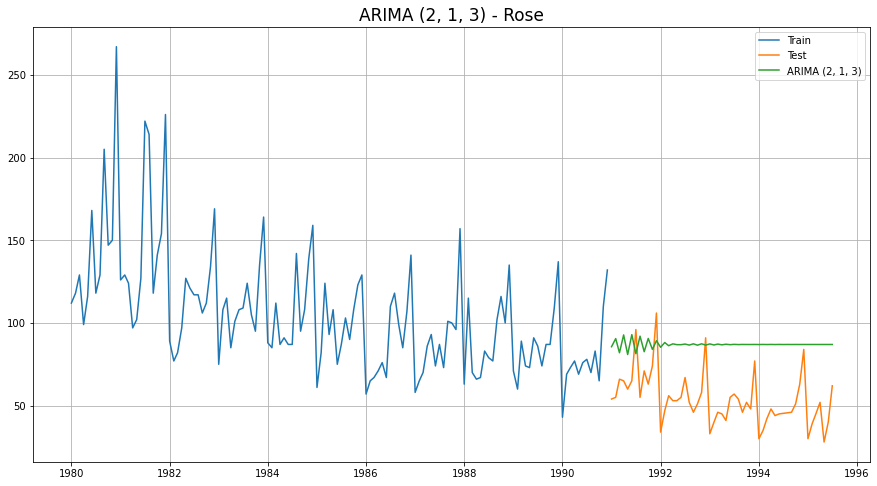

In [132]:
plt.plot(rtrain, label='Train')
plt.plot(rtest, label='Test')
plt.plot(predicted_auto_ARIMA,label='ARIMA (2, 1, 3)')


plt.legend(loc='best')
plt.grid()
plt.title('ARIMA (2, 1, 3) - Rose', fontsize=17);

plt.savefig('rose_arima_auto_213.jpg', bbox_inches='tight');

# Build a version of the ARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots on ROSE dataset

In [133]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

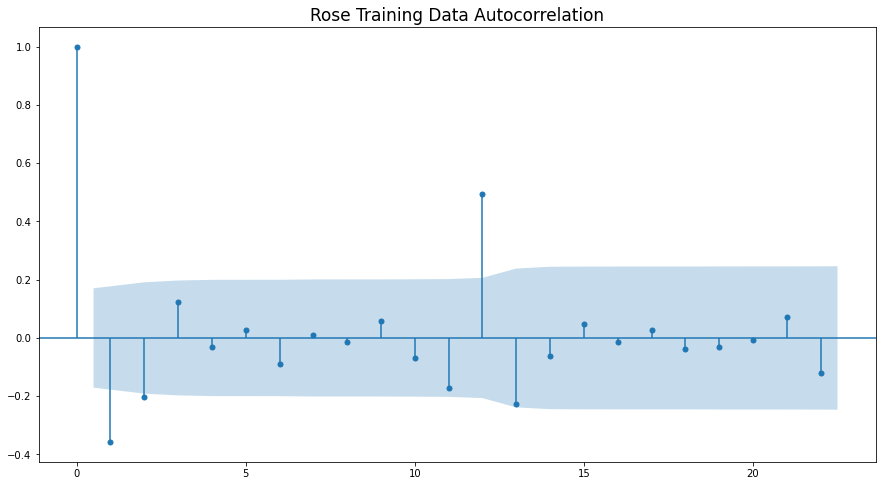

In [134]:
plot_acf(rtrain.diff(), missing='drop', alpha=0.05)
plt.title('Rose Training Data Autocorrelation',fontsize=17)
plt.savefig('rose_train_acf.jpg', bbox_inches='tight');

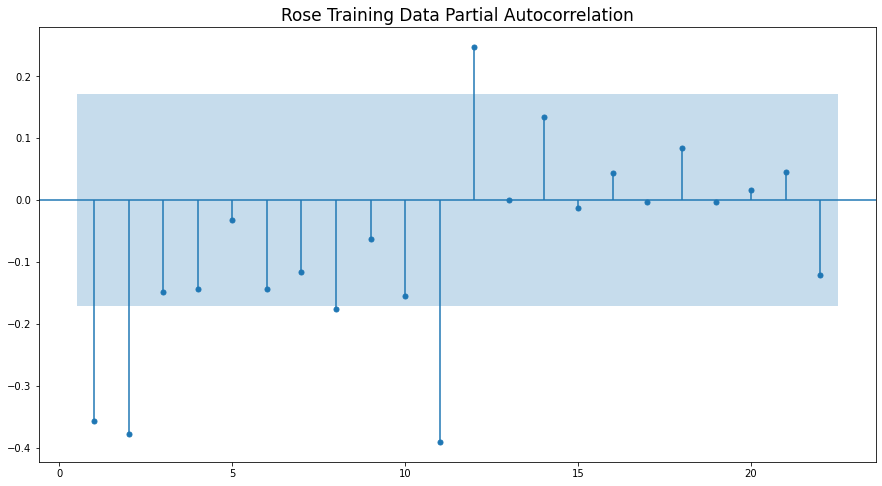

In [135]:
plot_pacf(rtrain.diff().dropna(), zero=False, alpha=0.05, method='ywmle')
plt.title('Rose Training Data Partial Autocorrelation',fontsize=17)
plt.savefig('rose_train_pacf.jpg', bbox_inches='tight');

Here, we have taken alpha=0.05.

The Auto-Regressive parameter in an ARIMA model is 'p' which comes from the significant lag before which the PACF plot cuts-off
The Moving-Average parameter in an ARIMA model is 'q' which comes from the significant lag before the ACF plot cuts-off
By looking at the above plots, we will take the value of p and q to be 2 and 2 respectively.

In [137]:
manual_ARIMA = ARIMA(rtrain['Rose'], order=(2,1,2))

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  132
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -635.935
Date:                Sun, 22 May 2022   AIC                           1281.871
Time:                        10:42:26   BIC                           1296.247
Sample:                    01-01-1980   HQIC                          1287.712
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4540      0.469     -0.969      0.333      -1.372       0.464
ar.L2          0.0001      0.170      0.001      0.999      -0.334       0.334
ma.L1         -0.2541      0.459     -0.554      0.5

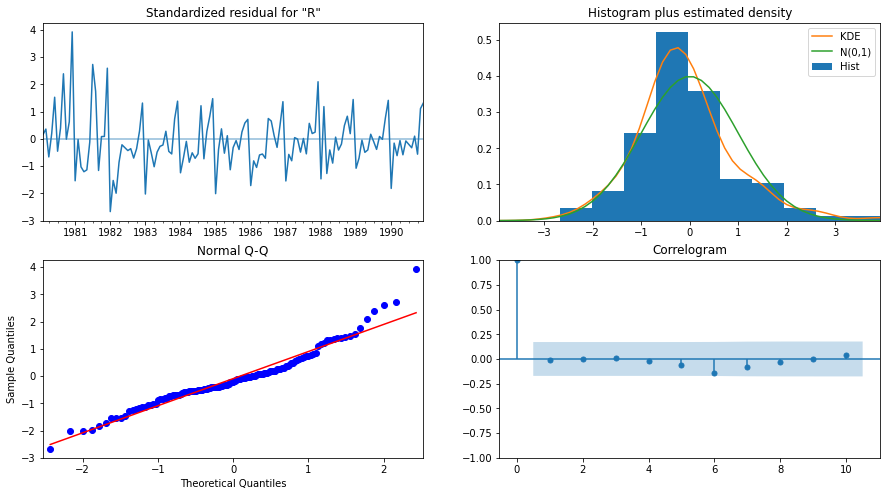

In [138]:
results_manual_ARIMA.plot_diagnostics();
plt.savefig('rose_train_manual_diag_plot.jpg', bbox_inches='tight');

# Predict on the Test Set using this model and evaluate the model.

In [139]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(rtest))

In [140]:
rmse = mean_squared_error(rtest['Rose'],predicted_manual_ARIMA,squared=False)
mape = mean_absolute_percentage_error(rtest['Rose'],predicted_manual_ARIMA)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 36.871196622260655 
MAPE: 76.05621272333192


In [141]:
temp_resultsR2 = pd.DataFrame({'Test RMSE Rose': rmse,'Test MAPE Rose':mape}
                           ,index=['ARIMA(2,1,2)'])


resultsR2 = pd.concat([resultsR0,temp_resultsR2])

resultsR2

,Test RMSE Rose,Test MAPE Rose
"ARIMA(2,1,3)",36.817423,75.848378
"ARIMA(2,1,2)",36.871197,76.056213


In [142]:
resultsR0 = resultsR2.copy()
resultsR0

,Test RMSE Rose,Test MAPE Rose
"ARIMA(2,1,3)",36.817423,75.848378
"ARIMA(2,1,2)",36.871197,76.056213


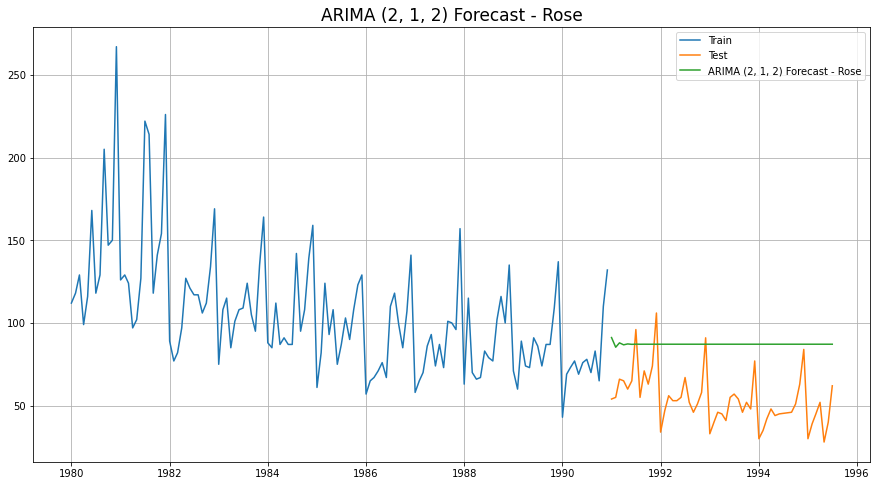

In [143]:
plt.plot(rtrain, label='Train')
plt.plot(rtest, label='Test')

plt.plot(predicted_manual_ARIMA, label = 'ARIMA (2, 1, 2) Forecast - Rose')
plt.grid()
plt.legend(loc='best')
plt.title('ARIMA (2, 1, 2) Forecast - Rose', fontsize=17)
plt.savefig('rose_arima_manual_forecast.jpg', bbox_inches='tight');

# Build an Automated version of a SARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC) - ROSE DATA

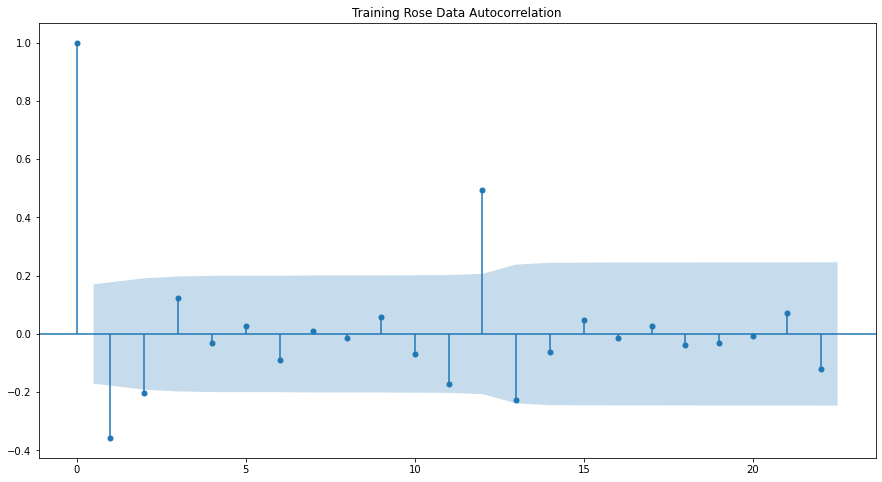

In [145]:
plot_acf(rtrain.diff(),title='Training Rose Data Autocorrelation',missing='drop');

We can see that there is a seasonality.

In [146]:
import itertools
p = q = range(0, 4)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
PDQ = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of the parameter combinations for the Model are')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], PDQ[i]))

Examples of the parameter combinations for the Model are
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (0, 1, 3)(0, 0, 3, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (1, 1, 3)(1, 0, 3, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)
Model: (2, 1, 3)(2, 0, 3, 12)
Model: (3, 1, 0)(3, 0, 0, 12)
Model: (3, 1, 1)(3, 0, 1, 12)
Model: (3, 1, 2)(3, 0, 2, 12)
Model: (3, 1, 3)(3, 0, 3, 12)


In [147]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [148]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in PDQ:
        SARIMA_model = sm.tsa.statespace.SARIMAX(rtrain['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:1323.9657875279158
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1145.423082720733
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:976.4375296380911


C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(0, 0, 3, 12) - AIC:4620.270461546251
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1139.921738995602
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1116.0207869386036
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:969.6913635753504
SARIMA(0, 1, 0)x(1, 0, 3, 12) - AIC:3001.451859547566
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:960.8812220353041


C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:962.8794540697521
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:955.573540894562


C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(2, 0, 3, 12) - AIC:3825.0727815583987
SARIMA(0, 1, 0)x(3, 0, 0, 12) - AIC:850.7535403931095
SARIMA(0, 1, 0)x(3, 0, 1, 12) - AIC:851.7482702637687
SARIMA(0, 1, 0)x(3, 0, 2, 12) - AIC:850.5304136128542


C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(3, 0, 3, 12) - AIC:3506.213452181075
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:1263.5369097383964
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1098.5554825918337
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:923.6314049383859


C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(0, 0, 3, 12) - AIC:4062.432568320479
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1095.793632491795
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1054.743433094527
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:918.8573483302789


C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(1, 0, 3, 12) - AIC:3718.620916180553
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:914.5982866536075
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:915.3332430461672
SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:901.1988271349375


C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(2, 0, 3, 12) - AIC:3475.197712959759
SARIMA(0, 1, 1)x(3, 0, 0, 12) - AIC:798.5889764801797
SARIMA(0, 1, 1)x(3, 0, 1, 12) - AIC:800.4844936083293
SARIMA(0, 1, 1)x(3, 0, 2, 12) - AIC:801.0595269404402


C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(3, 0, 3, 12) - AIC:3508.2439683333064
SARIMA(0, 1, 2)x(0, 0, 0, 12) - AIC:1251.6675430541054
SARIMA(0, 1, 2)x(0, 0, 1, 12) - AIC:1083.486697526487
SARIMA(0, 1, 2)x(0, 0, 2, 12) - AIC:913.4938486617702


C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(0, 0, 3, 12) - AIC:2995.603286311332
SARIMA(0, 1, 2)x(1, 0, 0, 12) - AIC:1088.8332843413825
SARIMA(0, 1, 2)x(1, 0, 1, 12) - AIC:1045.5400933538035
SARIMA(0, 1, 2)x(1, 0, 2, 12) - AIC:904.8310913587571
SARIMA(0, 1, 2)x(1, 0, 3, 12) - AIC:3717.7114967843636
SARIMA(0, 1, 2)x(2, 0, 0, 12) - AIC:913.0105912257991
SARIMA(0, 1, 2)x(2, 0, 1, 12) - AIC:914.1707545034917
SARIMA(0, 1, 2)x(2, 0, 2, 12) - AIC:887.9375085680747


C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(2, 0, 3, 12) - AIC:3721.736733448757
SARIMA(0, 1, 2)x(3, 0, 0, 12) - AIC:800.102018937503
SARIMA(0, 1, 2)x(3, 0, 1, 12) - AIC:801.9941080529609
SARIMA(0, 1, 2)x(3, 0, 2, 12) - AIC:802.5206528369222


C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(3, 0, 3, 12) - AIC:3022.507177404176
SARIMA(0, 1, 3)x(0, 0, 0, 12) - AIC:1243.950121673916
SARIMA(0, 1, 3)x(0, 0, 1, 12) - AIC:1076.7632646075988
SARIMA(0, 1, 3)x(0, 0, 2, 12) - AIC:905.692653338052


C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(0, 0, 3, 12) - AIC:3964.111036852745
SARIMA(0, 1, 3)x(1, 0, 0, 12) - AIC:1089.2051361212216
SARIMA(0, 1, 3)x(1, 0, 1, 12) - AIC:1034.8411212935393
SARIMA(0, 1, 3)x(1, 0, 2, 12) - AIC:896.8362523340518
SARIMA(0, 1, 3)x(1, 0, 3, 12) - AIC:3691.6056447848573
SARIMA(0, 1, 3)x(2, 0, 0, 12) - AIC:914.9477108987116
SARIMA(0, 1, 3)x(2, 0, 1, 12) - AIC:916.0630996882174
SARIMA(0, 1, 3)x(2, 0, 2, 12) - AIC:880.5509788252531


C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(2, 0, 3, 12) - AIC:3569.415018113366
SARIMA(0, 1, 3)x(3, 0, 0, 12) - AIC:802.0987124792142
SARIMA(0, 1, 3)x(3, 0, 1, 12) - AIC:803.9928772360103
SARIMA(0, 1, 3)x(3, 0, 2, 12) - AIC:804.5150722271089
SARIMA(0, 1, 3)x(3, 0, 3, 12) - AIC:3537.6571790084263
SARIMA(1, 1, 0)x(0, 0, 0, 12) - AIC:1308.161871082466
SARIMA(1, 1, 0)x(0, 0, 1, 12) - AIC:1135.2955447585707
SARIMA(1, 1, 0)x(0, 0, 2, 12) - AIC:963.9405391257685


C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(0, 0, 3, 12) - AIC:3897.039485633808
SARIMA(1, 1, 0)x(1, 0, 0, 12) - AIC:1124.886078680458
SARIMA(1, 1, 0)x(1, 0, 1, 12) - AIC:1105.408005502361
SARIMA(1, 1, 0)x(1, 0, 2, 12) - AIC:958.5001972947882


C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(1, 0, 3, 12) - AIC:3262.9364483444133
SARIMA(1, 1, 0)x(2, 0, 0, 12) - AIC:939.0984778664119
SARIMA(1, 1, 0)x(2, 0, 1, 12) - AIC:940.9087133661069
SARIMA(1, 1, 0)x(2, 0, 2, 12) - AIC:942.2973103071218


C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(2, 0, 3, 12) - AIC:3111.9838445149994
SARIMA(1, 1, 0)x(3, 0, 0, 12) - AIC:819.3931032272566
SARIMA(1, 1, 0)x(3, 0, 1, 12) - AIC:821.1501371573531
SARIMA(1, 1, 0)x(3, 0, 2, 12) - AIC:819.1305086853467


C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(3, 0, 3, 12) - AIC:3342.302711347493
SARIMA(1, 1, 1)x(0, 0, 0, 12) - AIC:1262.1840064255505
SARIMA(1, 1, 1)x(0, 0, 1, 12) - AIC:1094.3172708640957
SARIMA(1, 1, 1)x(0, 0, 2, 12) - AIC:923.0862224063864
SARIMA(1, 1, 1)x(0, 0, 3, 12) - AIC:4168.023459327619
SARIMA(1, 1, 1)x(1, 0, 0, 12) - AIC:1083.3937965031257
SARIMA(1, 1, 1)x(1, 0, 1, 12) - AIC:1054.7180547135954
SARIMA(1, 1, 1)x(1, 0, 2, 12) - AIC:916.3549428508104


C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1)x(1, 0, 3, 12) - AIC:3732.743010890288
SARIMA(1, 1, 1)x(2, 0, 0, 12) - AIC:905.9249060841146
SARIMA(1, 1, 1)x(2, 0, 1, 12) - AIC:907.2972867470805
SARIMA(1, 1, 1)x(2, 0, 2, 12) - AIC:900.6725795936803


C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1)x(2, 0, 3, 12) - AIC:3557.917787006939
SARIMA(1, 1, 1)x(3, 0, 0, 12) - AIC:789.2360439389992
SARIMA(1, 1, 1)x(3, 0, 1, 12) - AIC:790.9603447834212
SARIMA(1, 1, 1)x(3, 0, 2, 12) - AIC:790.8113850291048
SARIMA(1, 1, 1)x(3, 0, 3, 12) - AIC:3563.2199465467197
SARIMA(1, 1, 2)x(0, 0, 0, 12) - AIC:1251.9495040706292
SARIMA(1, 1, 2)x(0, 0, 1, 12) - AIC:1085.4861928101045
SARIMA(1, 1, 2)x(0, 0, 2, 12) - AIC:915.493840263531


C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(0, 0, 3, 12) - AIC:4051.714817114274
SARIMA(1, 1, 2)x(1, 0, 0, 12) - AIC:1090.776092785662
SARIMA(1, 1, 2)x(1, 0, 1, 12) - AIC:1042.6183211407576
SARIMA(1, 1, 2)x(1, 0, 2, 12) - AIC:906.7318500516412
SARIMA(1, 1, 2)x(1, 0, 3, 12) - AIC:3755.4221674978044
SARIMA(1, 1, 2)x(2, 0, 0, 12) - AIC:906.1690196723837
SARIMA(1, 1, 2)x(2, 0, 1, 12) - AIC:907.4597827897728
SARIMA(1, 1, 2)x(2, 0, 2, 12) - AIC:889.9030478809166


C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(2, 0, 3, 12) - AIC:3423.8013701947248
SARIMA(1, 1, 2)x(3, 0, 0, 12) - AIC:791.007380145697
SARIMA(1, 1, 2)x(3, 0, 1, 12) - AIC:792.6312809940029
SARIMA(1, 1, 2)x(3, 0, 2, 12) - AIC:792.1390257573922


C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(3, 0, 3, 12) - AIC:3494.1268982494853
SARIMA(1, 1, 3)x(0, 0, 0, 12) - AIC:1245.5463125316173
SARIMA(1, 1, 3)x(0, 0, 1, 12) - AIC:1072.9849739845033
SARIMA(1, 1, 3)x(0, 0, 2, 12) - AIC:907.4130105110019


C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(0, 0, 3, 12) - AIC:2824.860505872683
SARIMA(1, 1, 3)x(1, 0, 0, 12) - AIC:1082.3281487676015
SARIMA(1, 1, 3)x(1, 0, 1, 12) - AIC:1036.1950928744955
SARIMA(1, 1, 3)x(1, 0, 2, 12) - AIC:897.5232291617485
SARIMA(1, 1, 3)x(1, 0, 3, 12) - AIC:3716.7762765995117
SARIMA(1, 1, 3)x(2, 0, 0, 12) - AIC:908.2687610975237
SARIMA(1, 1, 3)x(2, 0, 1, 12) - AIC:909.7955660054643
SARIMA(1, 1, 3)x(2, 0, 2, 12) - AIC:880.2886589266546
SARIMA(1, 1, 3)x(2, 0, 3, 12) - AIC:3417.303909153494
SARIMA(1, 1, 3)x(3, 0, 0, 12) - AIC:792.990313358708
SARIMA(1, 1, 3)x(3, 0, 1, 12) - AIC:794.6310140547828
SARIMA(1, 1, 3)x(3, 0, 2, 12) - AIC:794.0467927115388


C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(3, 0, 3, 12) - AIC:2947.8869996827502
SARIMA(2, 1, 0)x(0, 0, 0, 12) - AIC:1280.253756153577
SARIMA(2, 1, 0)x(0, 0, 1, 12) - AIC:1128.777370471132
SARIMA(2, 1, 0)x(0, 0, 2, 12) - AIC:958.0793208829961


C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 0)x(0, 0, 3, 12) - AIC:4209.772770019851
SARIMA(2, 1, 0)x(1, 0, 0, 12) - AIC:1099.5086021575974
SARIMA(2, 1, 0)x(1, 0, 1, 12) - AIC:1076.786319864116
SARIMA(2, 1, 0)x(1, 0, 2, 12) - AIC:951.1988165558708


C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 0)x(1, 0, 3, 12) - AIC:3576.9669900775016
SARIMA(2, 1, 0)x(2, 0, 0, 12) - AIC:924.6004792645396
SARIMA(2, 1, 0)x(2, 0, 1, 12) - AIC:925.9757801384483
SARIMA(2, 1, 0)x(2, 0, 2, 12) - AIC:927.8380693280824
SARIMA(2, 1, 0)x(2, 0, 3, 12) - AIC:3461.6314416352716
SARIMA(2, 1, 0)x(3, 0, 0, 12) - AIC:806.0536407408968
SARIMA(2, 1, 0)x(3, 0, 1, 12) - AIC:808.0472637902985
SARIMA(2, 1, 0)x(3, 0, 2, 12) - AIC:806.4988191372563


C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 0)x(3, 0, 3, 12) - AIC:3860.4861491612473
SARIMA(2, 1, 1)x(0, 0, 0, 12) - AIC:1263.2315231800053
SARIMA(2, 1, 1)x(0, 0, 1, 12) - AIC:1094.2093491949408
SARIMA(2, 1, 1)x(0, 0, 2, 12) - AIC:922.9408472075866
SARIMA(2, 1, 1)x(0, 0, 3, 12) - AIC:4170.023459327611
SARIMA(2, 1, 1)x(1, 0, 0, 12) - AIC:1071.4249601101312
SARIMA(2, 1, 1)x(1, 0, 1, 12) - AIC:1052.9244471204865
SARIMA(2, 1, 1)x(1, 0, 2, 12) - AIC:916.2424912822669


C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(1, 0, 3, 12) - AIC:3093.4774607500367
SARIMA(2, 1, 1)x(2, 0, 0, 12) - AIC:896.5181608195448
SARIMA(2, 1, 1)x(2, 0, 1, 12) - AIC:897.6399565369483
SARIMA(2, 1, 1)x(2, 0, 2, 12) - AIC:899.4835866279672
SARIMA(2, 1, 1)x(2, 0, 3, 12) - AIC:3487.871349162793
SARIMA(2, 1, 1)x(3, 0, 0, 12) - AIC:785.3932600274738
SARIMA(2, 1, 1)x(3, 0, 1, 12) - AIC:787.3639258898208
SARIMA(2, 1, 1)x(3, 0, 2, 12) - AIC:787.0598888684405


C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(3, 0, 3, 12) - AIC:3605.500079107335
SARIMA(2, 1, 2)x(0, 0, 0, 12) - AIC:1253.91021161467
SARIMA(2, 1, 2)x(0, 0, 1, 12) - AIC:1085.9643552598225
SARIMA(2, 1, 2)x(0, 0, 2, 12) - AIC:916.3258311098716


C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(0, 0, 3, 12) - AIC:3823.694830478731
SARIMA(2, 1, 2)x(1, 0, 0, 12) - AIC:1073.2912713669489
SARIMA(2, 1, 2)x(1, 0, 1, 12) - AIC:1044.190935440186
SARIMA(2, 1, 2)x(1, 0, 2, 12) - AIC:907.6661488807475
SARIMA(2, 1, 2)x(1, 0, 3, 12) - AIC:3625.6087705733435
SARIMA(2, 1, 2)x(2, 0, 0, 12) - AIC:897.3464442046732
SARIMA(2, 1, 2)x(2, 0, 1, 12) - AIC:898.3781889026694
SARIMA(2, 1, 2)x(2, 0, 2, 12) - AIC:890.6687981146545


C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(2, 0, 3, 12) - AIC:3712.8594043560197
SARIMA(2, 1, 2)x(3, 0, 0, 12) - AIC:785.1199712642695
SARIMA(2, 1, 2)x(3, 0, 1, 12) - AIC:786.9410035569343
SARIMA(2, 1, 2)x(3, 0, 2, 12) - AIC:786.9640489468518


C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(3, 0, 3, 12) - AIC:3440.671558425702
SARIMA(2, 1, 3)x(0, 0, 0, 12) - AIC:1237.8702126608182
SARIMA(2, 1, 3)x(0, 0, 1, 12) - AIC:1067.8073334028375
SARIMA(2, 1, 3)x(0, 0, 2, 12) - AIC:908.3349289476025


C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(0, 0, 3, 12) - AIC:4062.481905973044
SARIMA(2, 1, 3)x(1, 0, 0, 12) - AIC:1073.256323495537
SARIMA(2, 1, 3)x(1, 0, 1, 12) - AIC:1024.0462094898394
SARIMA(2, 1, 3)x(1, 0, 2, 12) - AIC:890.9483348392333


C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(1, 0, 3, 12) - AIC:3696.541895887875
SARIMA(2, 1, 3)x(2, 0, 0, 12) - AIC:893.3579301935372
SARIMA(2, 1, 3)x(2, 0, 1, 12) - AIC:903.232809308032
SARIMA(2, 1, 3)x(2, 0, 2, 12) - AIC:879.2191807601847


C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(2, 0, 3, 12) - AIC:3591.9058283974564
SARIMA(2, 1, 3)x(3, 0, 0, 12) - AIC:782.407420793161
SARIMA(2, 1, 3)x(3, 0, 1, 12) - AIC:783.4101469602371
SARIMA(2, 1, 3)x(3, 0, 2, 12) - AIC:781.0452491035072


C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(3, 0, 3, 12) - AIC:3449.7421230120494
SARIMA(3, 1, 0)x(0, 0, 0, 12) - AIC:1269.8130062641503
SARIMA(3, 1, 0)x(0, 0, 1, 12) - AIC:1119.1703158042226
SARIMA(3, 1, 0)x(0, 0, 2, 12) - AIC:953.344058911804
SARIMA(3, 1, 0)x(0, 0, 3, 12) - AIC:4214.711883621455
SARIMA(3, 1, 0)x(1, 0, 0, 12) - AIC:1080.546845672644
SARIMA(3, 1, 0)x(1, 0, 1, 12) - AIC:1065.5569726784483
SARIMA(3, 1, 0)x(1, 0, 2, 12) - AIC:943.6865996304899


C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 0)x(1, 0, 3, 12) - AIC:3813.3775274479117
SARIMA(3, 1, 0)x(2, 0, 0, 12) - AIC:909.72031978875
SARIMA(3, 1, 0)x(2, 0, 1, 12) - AIC:911.0620713976489
SARIMA(3, 1, 0)x(2, 0, 2, 12) - AIC:913.0438816472868
SARIMA(3, 1, 0)x(2, 0, 3, 12) - AIC:3537.047983050635
SARIMA(3, 1, 0)x(3, 0, 0, 12) - AIC:796.0564701527572
SARIMA(3, 1, 0)x(3, 0, 1, 12) - AIC:795.5410167661679
SARIMA(3, 1, 0)x(3, 0, 2, 12) - AIC:794.6677017201754


C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 0)x(3, 0, 3, 12) - AIC:3481.9774975511327
SARIMA(3, 1, 1)x(0, 0, 0, 12) - AIC:1255.065818070936
SARIMA(3, 1, 1)x(0, 0, 1, 12) - AIC:1095.6894641197794
SARIMA(3, 1, 1)x(0, 0, 2, 12) - AIC:923.8872427547217
SARIMA(3, 1, 1)x(0, 0, 3, 12) - AIC:4172.023459327611
SARIMA(3, 1, 1)x(1, 0, 0, 12) - AIC:1064.6149136511087
SARIMA(3, 1, 1)x(1, 0, 1, 12) - AIC:1046.0837554147536
SARIMA(3, 1, 1)x(1, 0, 2, 12) - AIC:917.0308009384327
SARIMA(3, 1, 1)x(1, 0, 3, 12) - AIC:3540.446319723089
SARIMA(3, 1, 1)x(2, 0, 0, 12) - AIC:887.3204459899297
SARIMA(3, 1, 1)x(2, 0, 1, 12) - AIC:888.327920853788
SARIMA(3, 1, 1)x(2, 0, 2, 12) - AIC:890.1571523254606


C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)x(2, 0, 3, 12) - AIC:3342.6350965983884
SARIMA(3, 1, 1)x(3, 0, 0, 12) - AIC:775.4266990321439
SARIMA(3, 1, 1)x(3, 0, 1, 12) - AIC:775.495330077771
SARIMA(3, 1, 1)x(3, 0, 2, 12) - AIC:774.4002851035427


C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)x(3, 0, 3, 12) - AIC:3730.687553115494
SARIMA(3, 1, 2)x(0, 0, 0, 12) - AIC:1255.9835656475343
SARIMA(3, 1, 2)x(0, 0, 1, 12) - AIC:1086.7092401101968
SARIMA(3, 1, 2)x(0, 0, 2, 12) - AIC:917.7980110893807
SARIMA(3, 1, 2)x(0, 0, 3, 12) - AIC:3971.0855532681926
SARIMA(3, 1, 2)x(1, 0, 0, 12) - AIC:1066.277621132881
SARIMA(3, 1, 2)x(1, 0, 1, 12) - AIC:1046.1260517049286
SARIMA(3, 1, 2)x(1, 0, 2, 12) - AIC:909.2875120094859


C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(1, 0, 3, 12) - AIC:3834.195129926922
SARIMA(3, 1, 2)x(2, 0, 0, 12) - AIC:889.3181034638479
SARIMA(3, 1, 2)x(2, 0, 1, 12) - AIC:890.327744122761
SARIMA(3, 1, 2)x(2, 0, 2, 12) - AIC:896.1435524976398


C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(2, 0, 3, 12) - AIC:3833.258043595455
SARIMA(3, 1, 2)x(3, 0, 0, 12) - AIC:777.2505640347919
SARIMA(3, 1, 2)x(3, 0, 1, 12) - AIC:776.3462133374693
SARIMA(3, 1, 2)x(3, 0, 2, 12) - AIC:774.8809352377456


C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(3, 0, 3, 12) - AIC:3801.4989898897093
SARIMA(3, 1, 3)x(0, 0, 0, 12) - AIC:1243.7385948310948
SARIMA(3, 1, 3)x(0, 0, 1, 12) - AIC:1060.5397666855608
SARIMA(3, 1, 3)x(0, 0, 2, 12) - AIC:910.3340185886154


C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(0, 0, 3, 12) - AIC:3824.8706629855174
SARIMA(3, 1, 3)x(1, 0, 0, 12) - AIC:1066.9413369514314
SARIMA(3, 1, 3)x(1, 0, 1, 12) - AIC:1039.766238012301
SARIMA(3, 1, 3)x(1, 0, 2, 12) - AIC:900.048366040204


C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(1, 0, 3, 12) - AIC:3889.840372989331
SARIMA(3, 1, 3)x(2, 0, 0, 12) - AIC:884.0463711769332
SARIMA(3, 1, 3)x(2, 0, 1, 12) - AIC:885.9217103128233
SARIMA(3, 1, 3)x(2, 0, 2, 12) - AIC:880.5595715165068


C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(2, 0, 3, 12) - AIC:3595.4086305900537
SARIMA(3, 1, 3)x(3, 0, 0, 12) - AIC:775.5610184890733
SARIMA(3, 1, 3)x(3, 0, 1, 12) - AIC:776.3690402698232
SARIMA(3, 1, 3)x(3, 0, 2, 12) - AIC:778.2316176299639
SARIMA(3, 1, 3)x(3, 0, 3, 12) - AIC:2787.0991450218853


C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [149]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
222,"(3, 1, 1)","(3, 0, 2, 12)",774.400285
238,"(3, 1, 2)","(3, 0, 2, 12)",774.880935
220,"(3, 1, 1)","(3, 0, 0, 12)",775.426699
221,"(3, 1, 1)","(3, 0, 1, 12)",775.495330
252,"(3, 1, 3)","(3, 0, 0, 12)",775.561018


In [150]:
import statsmodels.api as sm

auto_SARIMA = sm.tsa.statespace.SARIMAX(rtrain['Rose'],
                                order=(3, 1, 1),
                                seasonal_order=(3, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA = auto_SARIMA.fit(maxiter=1000)
print(results_auto_SARIMA.summary())

C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                                        SARIMAX Results                                        
Dep. Variable:                                    Rose   No. Observations:                  132
Model:             SARIMAX(3, 1, 1)x(3, 0, [1, 2], 12)   Log Likelihood                -377.200
Date:                                 Sun, 22 May 2022   AIC                            774.400
Time:                                         10:52:01   BIC                            799.618
Sample:                                     01-01-1980   HQIC                           784.578
                                          - 12-01-1990                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0464      0.126      0.367      0.714      -0.202       0

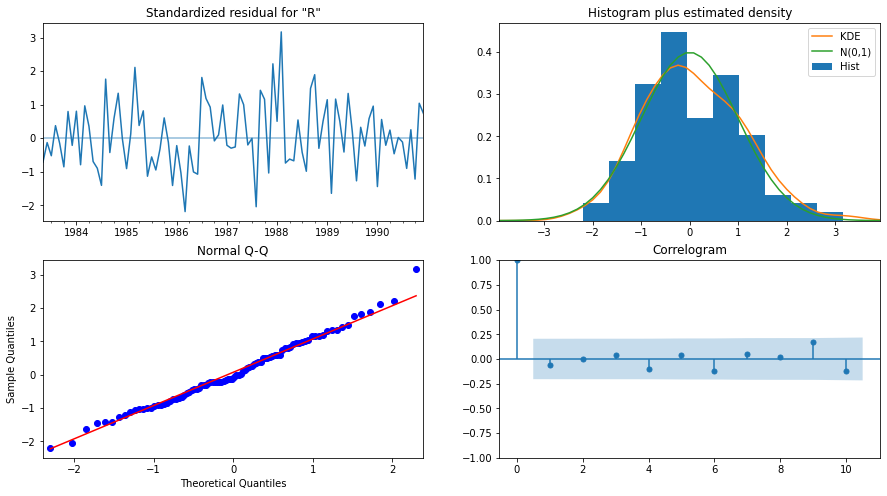

In [151]:
results_auto_SARIMA.plot_diagnostics();
plt.savefig('rose_sarima_auto_30212_diag_plot.jpg', bbox_inches='tight')

# Predict on the Test Set using this model and evaluate the model.

In [152]:
predicted_auto_SARIMA = results_auto_SARIMA.get_forecast(steps=len(rtest))
predicted_auto_SARIMA1= results_auto_SARIMA.get_prediction(start=pd.to_datetime('1991-01-01'), dynamic=False)

In [153]:
predicted_auto_SARIMA.summary_frame(alpha=0.05).head()

Rose,mean,mean_se,mean_ci_lower,mean_ci_upper
1991-01-01,55.235177,13.907798,27.976394,82.493961
1991-02-01,68.123048,13.991243,40.700716,95.545380
1991-03-01,67.908690,14.012295,40.445097,95.372283
1991-04-01,66.786179,14.099601,39.151469,94.420890
1991-05-01,69.760071,14.108960,42.107017,97.413125


In [154]:
predicted_auto_SARIMA1

In [155]:
rmse = mean_squared_error(rtest['Rose'],predicted_auto_SARIMA.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(rtest['Rose'],predicted_auto_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 18.881934379639958 
MAPE: 36.37547537124304


In [156]:
temp_resultsDf = pd.DataFrame({'Test RMSE Rose': rmse,'Test MAPE Rose':mape}
                           ,index=['SARIMA(3, 1, 1)(3, 0, 2, 12)'])


resultsDf = pd.concat([resultsR0,temp_resultsDf])

resultsDf

,Test RMSE Rose,Test MAPE Rose
"ARIMA(2,1,3)",36.817423,75.848378
"ARIMA(2,1,2)",36.871197,76.056213
"SARIMA(3, 1, 1)(3, 0, 2, 12)",18.881934,36.375475


In [157]:
resultsR0 = resultsDf.copy()
resultsR0.to_csv('rose_auto_sarima.csv')
resultsR0

,Test RMSE Rose,Test MAPE Rose
"ARIMA(2,1,3)",36.817423,75.848378
"ARIMA(2,1,2)",36.871197,76.056213
"SARIMA(3, 1, 1)(3, 0, 2, 12)",18.881934,36.375475


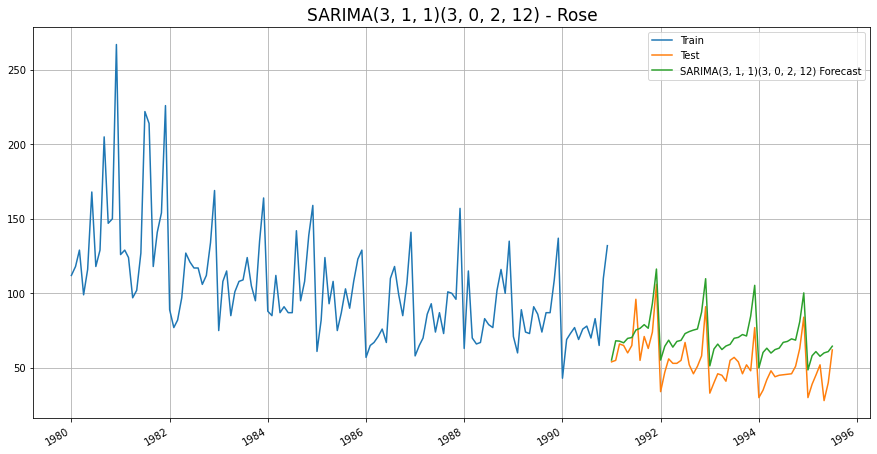

In [158]:
plt.plot(rtrain, label='Train')
plt.plot(rtest, label='Test')
# plt.plot(predicted_auto_SARIMA,label='SARIMA(3, 1, 1)(3, 0, 2, 12)')
# predicted_auto_SARIMA.plot(label='SARIMA(3, 1, 1)(3, 0, 2, 12)')
predicted_auto_SARIMA.predicted_mean.plot(label='SARIMA(3, 1, 1)(3, 0, 2, 12) Forecast')


plt.legend(loc='best')
plt.grid()
plt.title('SARIMA(3, 1, 1)(3, 0, 2, 12) - Rose', fontsize=17);

plt.savefig('rose_sarima_auto_30212.jpg', bbox_inches='tight');

# Build a version of the SARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots. - Seasonality at 12

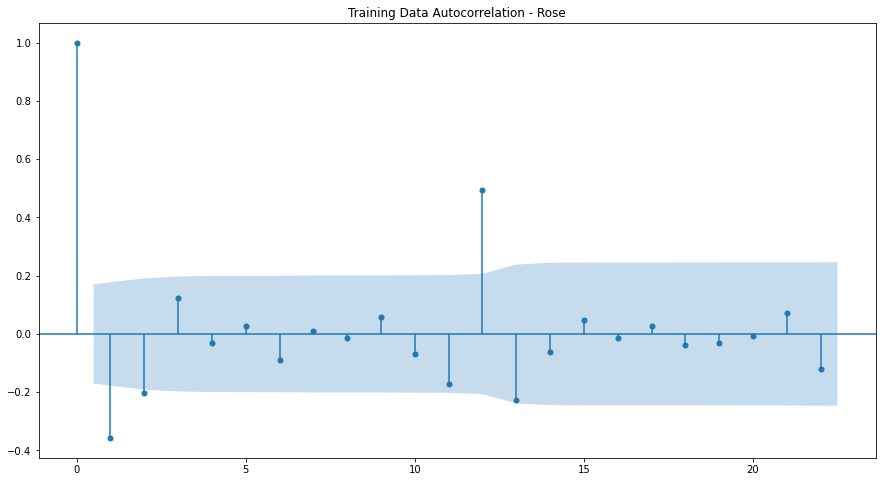

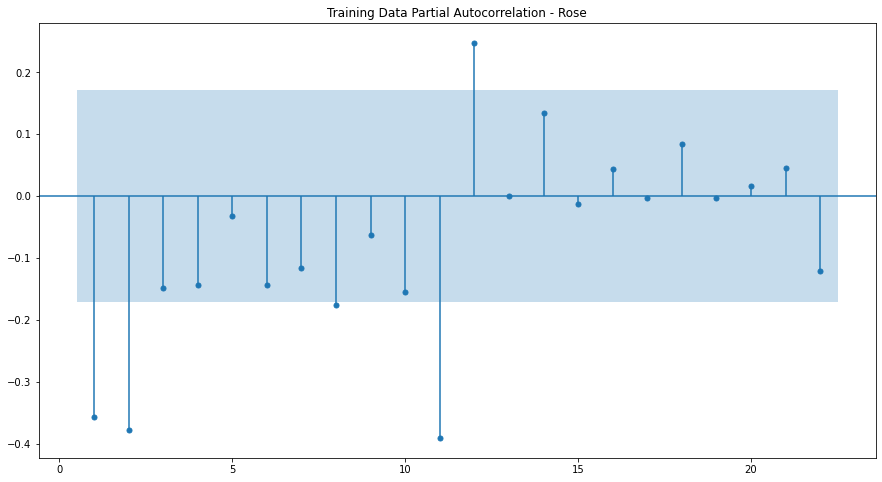

In [159]:
plot_acf(rtrain.diff(),title='Training Data Autocorrelation - Rose',missing='drop')
plot_pacf(rtrain.diff().dropna(),title='Training Data Partial Autocorrelation - Rose',zero=False,method='ywmle');

Here, we have taken alpha=0.05.

We are going to take the seasonal period as 12 We are taking the p value to be 2 and the q value also to be 2 as the parameters same as the ARIMA model.

The Auto-Regressive parameter in an SARIMA model is 'P' which comes from the significant lag after which the PACF plot cuts-off to 0.
The Moving-Average parameter in an SARIMA model is 'Q' which comes from the significant lag after which the ACF plot cuts-off to 3.

In [160]:
import statsmodels.api as sm

manual_SARIMA = sm.tsa.statespace.SARIMAX(rtrain['Rose'],
                                order=(2,1,2),
                                seasonal_order=(2, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA = manual_SARIMA.fit(maxiter=1000)
print(results_manual_SARIMA.summary())

C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                                     SARIMAX Results                                      
Dep. Variable:                               Rose   No. Observations:                  132
Model:             SARIMAX(2, 1, 2)x(2, 1, 2, 12)   Log Likelihood                -379.498
Date:                            Sun, 22 May 2022   AIC                            776.996
Time:                                    10:54:54   BIC                            799.692
Sample:                                01-01-1980   HQIC                           786.156
                                     - 12-01-1990                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8551      0.146     -5.838      0.000      -1.142      -0.568
ar.L2         -0.0022      0.125   

In [161]:
import statsmodels.api as sm

manual_SARIMA = sm.tsa.statespace.SARIMAX(rtrain['Rose'],
                                order=(2,1,2),
                                seasonal_order=(3, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA1 = manual_SARIMA.fit(maxiter=1000)
print(results_manual_SARIMA1.summary())

C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                                     SARIMAX Results                                      
Dep. Variable:                               Rose   No. Observations:                  132
Model:             SARIMAX(2, 1, 2)x(3, 1, 2, 12)   Log Likelihood                -334.893
Date:                            Sun, 22 May 2022   AIC                            689.786
Time:                                    10:55:18   BIC                            713.730
Sample:                                01-01-1980   HQIC                           699.393
                                     - 12-01-1990                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7096      0.404      1.755      0.079      -0.083       1.502
ar.L2         -0.1496      0.176   

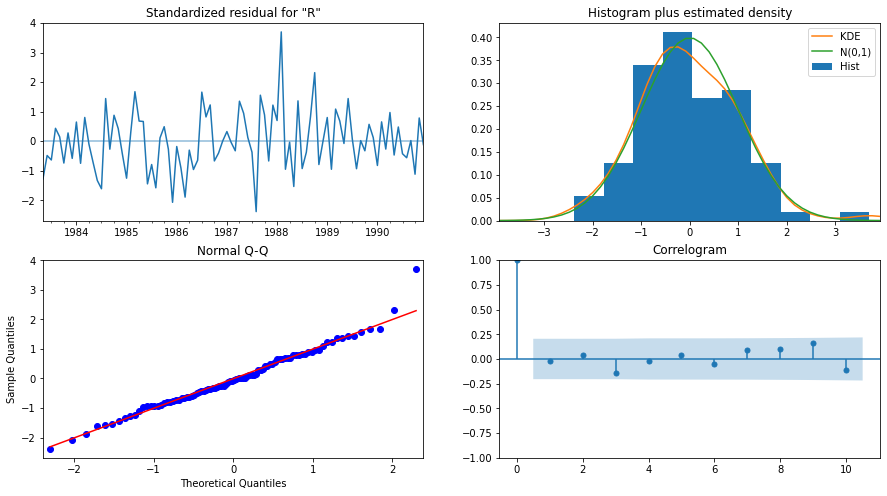

In [162]:
results_manual_SARIMA.plot_diagnostics()
plt.savefig('rose_sarima_21212.jpg', bbox_inches='tight');

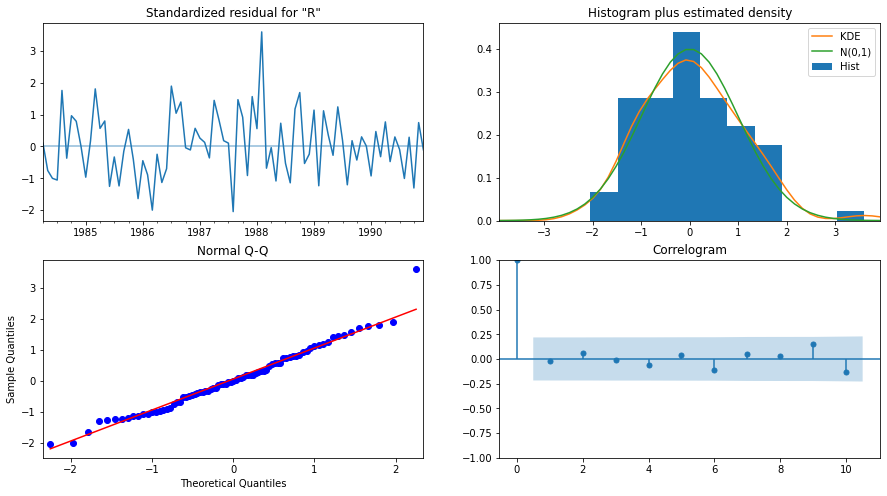

In [163]:
results_manual_SARIMA1.plot_diagnostics()
plt.savefig('rose_sarima_31212.jpg', bbox_inches='tight');

# Predict on the Test Set using this model and evaluate the model.

In [164]:
predicted_manual_SARIMA = results_manual_SARIMA.get_forecast(steps=len(rtest))
                                                             
predicted_manual_SARIMA1 = results_manual_SARIMA1.get_forecast(steps=len(rtest))

In [165]:
rmse = mean_squared_error(rtest['Rose'],predicted_manual_SARIMA.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(rtest['Rose'],predicted_manual_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 16.5507288588888 
MAPE: 25.47715033758639


In [166]:
rmse = mean_squared_error(rtest['Rose'],predicted_manual_SARIMA1.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(rtest['Rose'],predicted_manual_SARIMA1.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 15.364115300018124 
MAPE: 22.97301863914106


In [168]:
resultsR0 = resultsDf.copy()

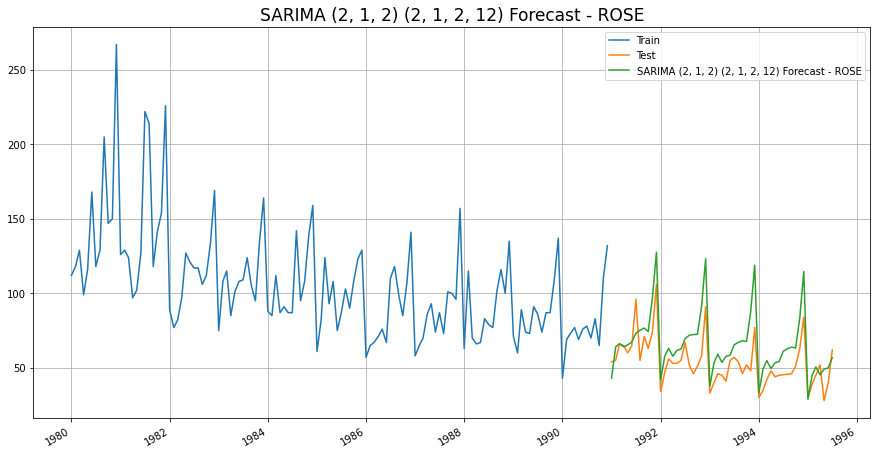

In [169]:
plt.plot(rtrain, label='Train')
plt.plot(rtest, label ='Test')

predicted_manual_SARIMA.predicted_mean.plot(label = 'SARIMA (2, 1, 2) (2, 1, 2, 12) Forecast - ROSE')
plt.grid()
plt.legend(loc='best')
plt.title('SARIMA (2, 1, 2) (2, 1, 2, 12) Forecast - ROSE', fontsize=17)
plt.savefig('rose_sarima_manual_forecast.jpg', bbox_inches='tight');

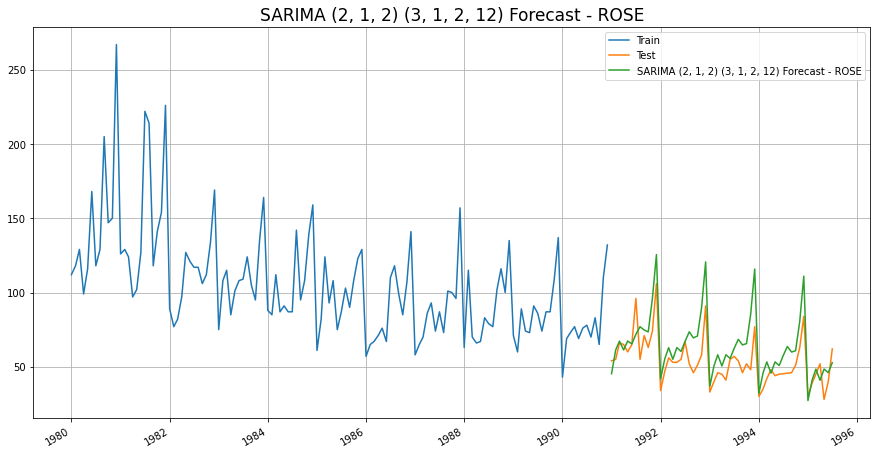

In [170]:
plt.plot(rtrain, label='Train')
plt.plot(rtest, label ='Test')

predicted_manual_SARIMA1.predicted_mean.plot(label = 'SARIMA (2, 1, 2) (3, 1, 2, 12) Forecast - ROSE')
plt.grid()
plt.legend(loc='best')
plt.title('SARIMA (2, 1, 2) (3, 1, 2, 12) Forecast - ROSE', fontsize=17)
plt.savefig('rose_sarima_manual_forecast1.jpg', bbox_inches='tight');

# Building the most optimum model on the Full Data.

Here, we have a scenario where our training data was stationary but our full data was not stationary. So, we will use the same parameters as our training data but with adding a level of differencing which is needed for the data to be stationary.

In [172]:
full_data_model = sm.tsa.statespace.SARIMAX(df['Rose'],
                                order=(2,1,2),
                                seasonal_order=(2,1,2,12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                                     SARIMAX Results                                      
Dep. Variable:                               Rose   No. Observations:                  187
Model:             SARIMAX(2, 1, 2)x(2, 1, 2, 12)   Log Likelihood                -587.531
Date:                            Sun, 22 May 2022   AIC                           1193.062
Time:                                    10:57:59   BIC                           1219.976
Sample:                                01-01-1980   HQIC                          1203.997
                                     - 07-01-1995                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8648      0.101     -8.560      0.000      -1.063      -0.667
ar.L2          0.0342      0.090   

# Evaluate the model on the whole data and predict 12 months into the future

In [173]:
predicted_manual_SARIMA_full_data = results_full_data_model.get_forecast(steps=12)

In [174]:
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_full_data.summary_frame(alpha=0.05)
pred_full_manual_SARIMA_date.head()

Rose,mean,mean_se,mean_ci_lower,mean_ci_upper
1995-08-01,43.085953,12.671688,18.249901,67.922005
1995-09-01,43.341304,12.957416,17.945235,68.737372
1995-10-01,45.824350,12.961426,20.420422,71.228278
1995-11-01,57.400912,13.121800,31.682657,83.119167
1995-12-01,85.081144,13.130625,59.345592,110.816696


In [176]:
rmse = mean_squared_error(df['Rose'],results_full_data_model.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 35.91050920756094


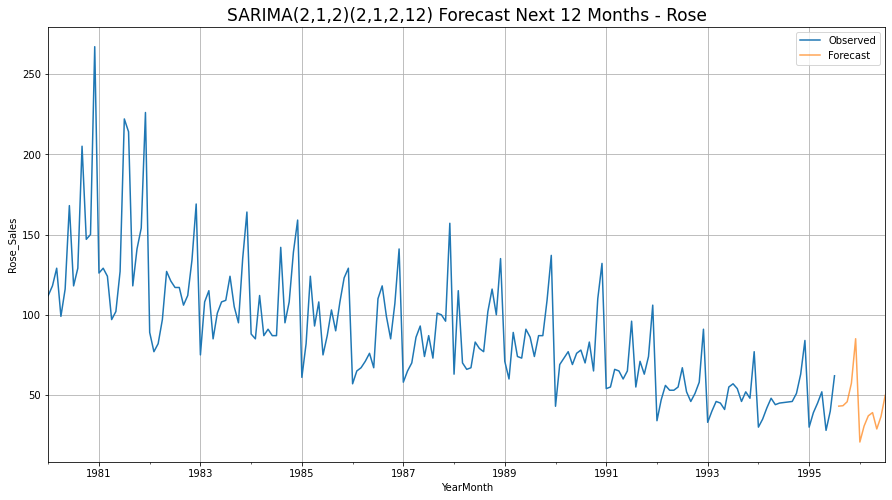

In [178]:
axis = df['Rose'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)

axis.set_xlabel('YearMonth')
axis.set_ylabel('Rose_Sales')
plt.legend(loc='best')
plt.grid();
plt.title('SARIMA(2,1,2)(2,1,2,12) Forecast Next 12 Months - Rose', fontsize=17);
plt.savefig('rose_forecast.jpg', bbox_inches='tight');

In [179]:
resultsDf

,Test RMSE Rose,Test MAPE Rose
"ARIMA(2,1,3)",36.817423,75.848378
"ARIMA(2,1,2)",36.871197,76.056213
"SARIMA(3, 1, 1)(3, 0, 2, 12)",18.881934,36.375475
"SARIMA(2,1,2)(3,1,2,12)",15.364115,22.973019


In [180]:
resultsR0 = resultsDf.copy()
resultsR0.to_csv('rose_all_arima.csv')

In [181]:
resultsDf.sort_values(by=['Test RMSE Rose'])

,Test RMSE Rose,Test MAPE Rose
"SARIMA(2,1,2)(3,1,2,12)",15.364115,22.973019
"SARIMA(3, 1, 1)(3, 0, 2, 12)",18.881934,36.375475
"ARIMA(2,1,3)",36.817423,75.848378
"ARIMA(2,1,2)",36.871197,76.056213


# Building the second most optimum model on ROSE - TES ETS(A, A, A)
Here, we have a scenario where our training data was stationary but our full data was not stationary. So, we will use the same parameters as our training data but with adding a level of differencing which is needed for the data to be stationary.

In [194]:
# Initializing the Double Exponential Smoothing Model
model_TES_am = ExponentialSmoothing(df,trend='add',seasonal='additive',initialization_method='estimated', damped_trend=False)
# Fitting the model
model_TES_am = model_TES_am.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES_am.params)

C:\Users\Arun Sivaji\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'



==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.09623105607316472, 'smoothing_trend': 0.007090440762370349, 'smoothing_seasonal': 0.003451514779158787, 'damping_trend': nan, 'initial_level': 146.22170986283172, 'initial_trend': -0.5635821299809678, 'initial_seasons': array([-28.08544482, -17.1164866 ,  -8.96191709, -15.74055276,
       -11.83907447,  -5.7213814 ,   5.36590498,   5.29087572,
         2.66576186,   1.95435652,  17.09912238,  55.963095  ]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [195]:
TES_predict =  model_TES_am.forecast(steps=12)
TES_predict
prediction_1 = TES_predict
TES_predict.to_csv('rose_forecast_tes.csv')

In [196]:
plt.rcParams["figure.figsize"] = [16,9]

In [197]:
pred_1_df = pd.DataFrame({'lower_CI':prediction_1 - 1.96*np.std(model_TES_am.resid,ddof=1),
                          'prediction':prediction_1,
                          'upper_ci': prediction_1 + 1.96*np.std(model_TES_am.resid,ddof=1)})
pred_1_df.head()

,lower_CI,prediction,upper_ci
1995-08-01,14.903234,49.772739,84.642245
1995-09-01,11.764820,46.634326,81.503831
1995-10-01,10.536511,45.406017,80.275522
1995-11-01,25.159118,60.028624,94.898129
1995-12-01,63.491114,98.360619,133.230125


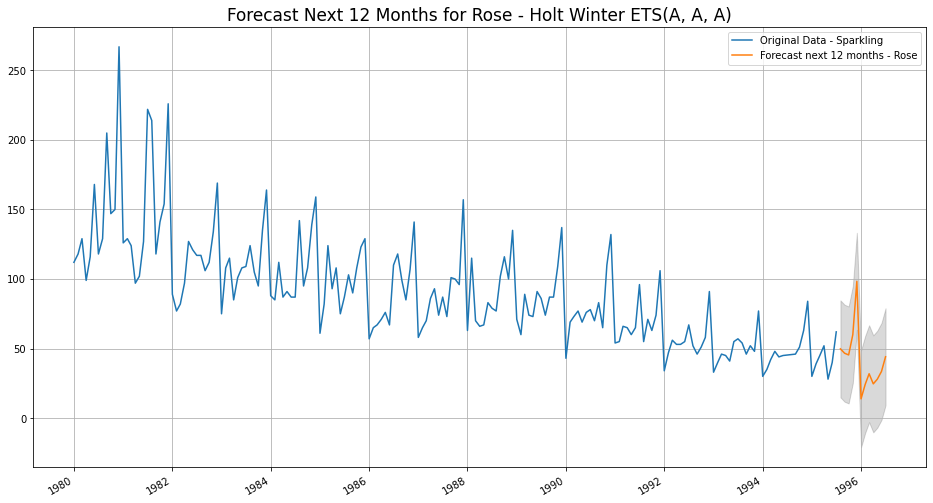

In [199]:

plt.plot(df['Rose'], label='Original Data - Sparkling')

ax =TES_predict.plot(label='Forecast next 12 months - Rose')


ax.fill_between(pred_1_df.index,pred_1_df['lower_CI'], pred_1_df['upper_ci'], color='k', alpha=.15)

plt.legend(loc='best')
plt.grid()
plt.title('Forecast Next 12 Months for Rose - Holt Winter ETS(A, A, A)', fontsize=17);

plt.savefig('rose_forecast_tes.jpg', bbox_inches='tight');